In [1]:
%matplotlib inline

# Import custom scripts

In [2]:
path_scripts = '/mnt/kauffman/joosts/projects/STRT_epidermis/scripts'

In [3]:
import sys
sys.path.append(path_scripts)

In [4]:
from EPI_misc_scripts_v1_1 import *
from EPI_affinity_propagation_v1_0 import *
from EPI_neg_binom_regression_v1_1 import *
from EPI_pseudotemporal_ordering_v1_0 import *
from EPI_gene_neighbor_network_v1_0 import *

Couldn't import dot_parser, loading of dot files will not be possible.


In [5]:
import matplotlib as mpl
import sklearn
from sklearn.metrics.cluster import adjusted_rand_score as ARS

# Initialize engines

In [6]:
from ipyparallel import Client

In [7]:
c = Client(profile='default')

In [8]:
dview = c[:]

In [9]:
dview.execute('import sys')
dview.execute('sys.path.append("/mnt/kauffman/joosts/projects/STRT_epidermis/scripts")')
dview.execute('from EPI_misc_scripts_v1_1 import *')
dview.execute('from EPI_affinity_propagation_v1_0 import *')
dview.execute('from EPI_neg_binom_regression_v1_1 import *')
dview.execute('from EPI_pseudotemporal_ordering_v1_0 import *')
dview.execute('from EPI_gene_neighbor_network_v1_0 import *')

<AsyncResult: execute>

# Import Data

In [10]:
exp_id = '201509151726'
path_input = '/mnt/kauffman/joosts/projects/STRT_epidermis/data_input/v1.8'
path_output = '/mnt/kauffman/joosts/projects/STRT_epidermis/data_output/v1.8'
path_figures = '/mnt/kauffman/joosts/projects/STRT_epidermis/figures/v1.8'

In [11]:
seq = loadData_v1(path_input, exp_id, 'seq', 'DataFrame')
meta = loadData_v1(path_input, exp_id, 'meta', 'DataFrame')

In [12]:
s_groups_1st = loadData_v1(path_output, exp_id, 's_groups_1st', 'Series')
g_groups_1st = loadData_v1(path_output, exp_id, 'g_groups_1st', 'Series')

In [13]:
s_groups_IFE_b = loadData_v1(path_output, exp_id, 's_groups_IFE_b', 'Series')
g_groups_IFE_b = loadData_v1(path_output, exp_id, 'g_groups_IFE_b', 'Series')

In [14]:
s_groups_IB = loadData_v1(path_output, exp_id, 's_groups_IB', 'Series')
g_groups_IB = loadData_v1(path_output, exp_id, 'g_groups_IB', 'Series')

In [15]:
s_groups_OB = loadData_v1(path_output, exp_id, 's_groups_OB', 'Series')
g_groups_OB = loadData_v1(path_output, exp_id, 'g_groups_OB', 'Series')

In [16]:
s_groups_uHF = loadData_v1(path_output, exp_id, 's_groups_uHF', 'Series')
g_groups_uHF = loadData_v1(path_output, exp_id, 'g_groups_uHF', 'Series')

In [17]:
s_groups_2nd = loadData_v1(path_output, exp_id, 's_groups_2nd', 'Series')

In [18]:
cells_SC = loadData_v1(path_output, exp_id, 'cells_SC', 'DataFrame')

In [19]:
tsne_basal = loadData_v1(path_output, exp_id, 'tsne_basal', 'DataFrame')

In [20]:
tsne_basal['y'] = tsne_basal['y'] * -1

In [21]:
s_groups_basal = loadData_v1(path_output, exp_id, 's_groups_basal', 'Series')

In [22]:
PTO_coords_IFE = loadData_v1(path_output, exp_id, 'PTO_coords_IFE', 'Series')
PTO_coords_spatial = loadData_v1(path_output, exp_id, 'PTO_coords_spatial', 'Series')

In [23]:
IFE_fitted = loadData_v1(path_output, exp_id, 'IFE_fitted', 'DataFrame')
IFE_stats = loadData_v1(path_output, exp_id, 'IFE_stats', 'DataFrame')

In [24]:
spatial_fitted = loadData_v1(path_output, exp_id, 'spatial_fitted', 'DataFrame')
spatial_stats = loadData_v1(path_output, exp_id, 'spatial_stats', 'DataFrame')

In [25]:
PT_corr_max = loadData_v1(path_output, exp_id, 'PT_corr_max', 'Series')
PS_corr_max = loadData_v1(path_output, exp_id, 'PS_corr_max', 'Series')

In [26]:
s_groups_Lgr5 = loadData_v1(path_output, exp_id, 's_groups_Lgr5', 'Series')
s_groups_Cd34 = loadData_v1(path_output, exp_id, 's_groups_Cd34', 'Series')
s_groups_Gli1 = loadData_v1(path_output, exp_id, 's_groups_Gli1', 'Series')
s_groups_Lgr6 = loadData_v1(path_output, exp_id, 's_groups_Lgr6', 'Series')
s_groups_Lrig1 = loadData_v1(path_output, exp_id, 's_groups_Lrig1', 'Series')
s_groups_Krt14 = loadData_v1(path_output, exp_id, 's_groups_Krt14', 'Series')

In [27]:
dict_s_groups = {'Lgr5':s_groups_Lgr5,
                 'Cd34':s_groups_Cd34,
                 'Gli1':s_groups_Gli1,
                 'Lgr6':s_groups_Lgr6,
                 'Lrig1':s_groups_Lrig1,
                 'Krt14':s_groups_Krt14}

## Colormaps

In [28]:
cmap_1st = {2:'#00CC00',
          1:'#FFE000',
          8:'#FF9900',
          0:'#FF3300',
          10:'#CC0000',
          6:'#cab2d6',
          3:'#A68BC2',
          4:'#65429A',
          5:'#000066',
          7:'#0066FF',
          9:'#33CCCC',
          11:'#FF99CC',
          12:'#660033'}

In [332]:
cmap_SC = {'Lgr5':'#0000FF',
           'Cd34':'#00CCFF',
           'Gli1':'#FF0000',
           'Lgr6':'#FFCC00',
           'Lrig1':'#9900FF',
           'Krt14':'#00CC00',
           'Basal':'black',
           'SC_basal':'black',
           'SCM(+)':'black'}

In [30]:
cmap_2nd = {0:'#33a02c',
            1:'#b2df8a',
            2:'#00FF00',
            3:'#FFE000',
            4:'#FF9900',
            5:'#FF3300',
            6:'#CC0000',
            7:'#CC0066',
            8:'#FF99CC',
            9:'#FFCCCC',
            10:'#D2C5E1',
            11:'#A68BC2',
            12:'#6a3d9a',
            13:'#2A183E',
            14:'#000066',
            15:'#0000FF',
            16:'#33CCFF',
            17:'#99CCFF',
            18:'#666699',
            19:'#000066',
            20:'#33CCCC',
            21:'#00FFFF',
            22:'#006666',
            23:'#FF99CC',
            24:'#660033'}

In [31]:
cmap_SC_clusters = {0:'#66c2a5',1:'#fc8d62',2:'#8da0cb',3:'#e78ac3',4:'#a6d854',5:'#ffd92f',6:'#e5c494'}

In [32]:
cmap_basal = {1:'#b2df8a',
              0:'#33a02c',
              2:'#8dd3c7',
              3:'#cab2d6',
              4:'#6a3d9a',
              6:'#a6cee3',
              5:'#1f78b4'}

In [33]:
C = open('%s/cmap_Gn_Yl_Rd.txt' % path_input,'r').read().split()

cmap_Gn_Yl_Rd = mpl.colors.ListedColormap(C)

In [34]:
C = open('%s/cmap_GrVlBlCy.txt' % path_input,'r').read().replace(',','').split()

cmap_GrVlBlCy = mpl.colors.ListedColormap(C)

## Namemaps

In [35]:
#Create namemap for sample groups:

nmap_1st = {2:'IFE basal cells (IFE B)',
          1:'IFE differentiated cells I (IFE DI)',
          8:'IFE differentiated cells II (IFE DII)',
          0:'IFE keratinized layer I (IFE KI)',
          10:'IFE keratinized layer II (IFE KII)',
          6:'Upper hair follicle I (uHF I)',
          3:'Upper hair follicle II (uHF II)',
          4:'Upper hair follicle III (uHF III)',
          5:'Sebaceous gland (SG)',
          7:'Outer bulge (OB)',
          9:'Inner bulge (IB)',
          11:'T cells (TC)',
          12:'Langerhans cells (LH)'}

In [36]:
nmap_2nd = {0:'Interfollicular basal I',
            1:'Interfollicular basal II',
            2:'Infundibular basal',
            3:'IFE differentiated cells I',
            4:'IFE differentiated cells II',
            5:'IFE keratinized layer I',
            6:'IFE keratinized layer II',
            7:'upper HF I',
            8:'upper HF II',
            9:'upper HF III',
            10:'upper HF IV',
            11:'upper HF V',
            12:'upper HF VI',
            13:'upper HF VII',
            14:'Sebaceous gland (SG)',
            15:'Outer bulge I',
            16:'Outer bulge II',
            17:'Outer bulge III',
            18:'Outer bulge IV',
            19:'Outer bulge V',
            20:'Inner bulge I',
            21:'Inner bulge II',
            22:'Inner bulge III',
            23:'T cells (TC)',
            24:'Langerhans cells (LH)'}

In [37]:
nmap_2nd_short = {0:'IFE B I',
                  1:'IFE B II',
                  2:'INFU B',
                  3:'IFE D I',
                  4:'IFE D II',
                  5:'IFE K I',
                  6:'IFE K II',
                  7:'uHF I',
                  8:'uHF II',
                  9:'uHF III',
                  10:'uHF IV',
                  11:'uHF V',
                  12:'uHF VI',
                  13:'uHF VII',
                  14:'SG',
                  15:'OB I',
                  16:'OB II',
                  17:'OB III',
                  18:'OB IV',
                  19:'OB V',
                  20:'IB I',
                  21:'IB II',
                  22:'IB III',
                  23:'TC',
                  24:'LH'}

In [38]:
markers_2nd = {0: 'o',
            1: 'o',
            2: 'o',
            3:'s',
            4:'s',
            5:'s',
            6:'s',
            7:'^',
            8:'^',
            9:'^',
            10:'^',
            11:'^',
            12:'^',
            13:'^',
            14:'s',
            15:'D',
            16:'D',
            17:'D',
            18:'D',
            19:'D',
            20:'H',
            21:'H',
            22:'H',
            23:'s',
            24:'s'}

In [39]:
markers_2nd_size = {0:750,
            1:750,
            2:750,
            3:750,
            4:750,
            5:750,
            6:750,
            7:750,
            8:750,
            9:750,
            10:750,
            11:750,
            12:750,
            13:750,
            14:750,
            15:500,
            16:500,
            17:500,
            18:500,
            19:500,
            20:750,
            21:750,
            22:750,
            23:750,
            24:750}

In [40]:
nmap_basal = {1:'Basal cells I',
              0:'Basal cells II',
              2:'Basal cells III',
              3:'Basal cells IV',
              4:'Basal cells V',
              6:'Basal cells VI',
              5:'Basal cells VII'}

In [41]:
nmap_SC_clusters = {0:'Cluster #1',
                     1:'Cluster #2',
                     2:'Cluster #3',
                     3:'Cluster #4',
                     4:'Cluster #5',
                     5:'Cluster #6',
                    6:'Cluster #7'}

# Co-expression of stem cell markers in keratinocytes

In [117]:
genes = ['Lgr5','Cd34','Gli1','Lgr6','Lrig1','Krt14']
data = dict_s_groups

SC_coexp = pd.DataFrame(index = genes, columns = genes)

for g1 in SC_coexp.index:
    
    ix_1 = set(data[g1].index)
    
    for g2 in SC_coexp.columns:
        
        ix_2 = set(data[g2].index)
        
        inters = ix_1 & ix_2
        
        SC_coexp.ix[g1, g2] = float(len(inters)) / float(len(ix_1))

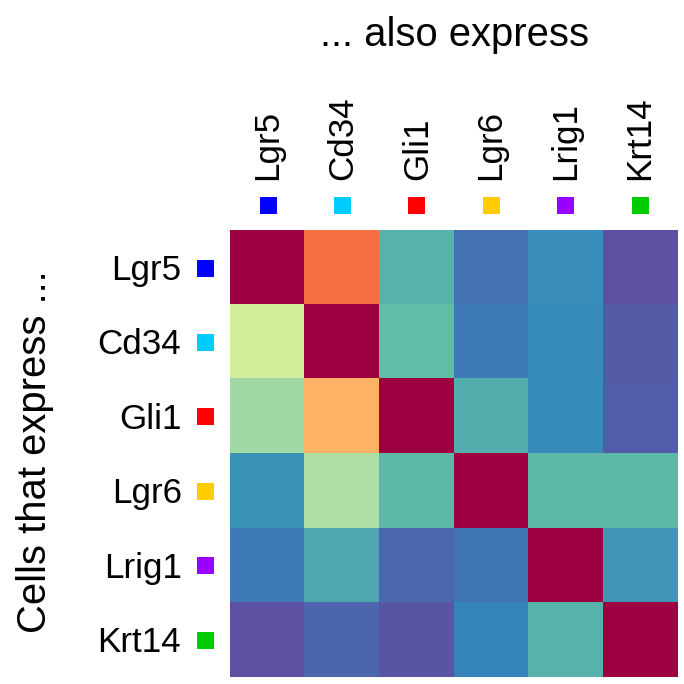

In [118]:
dataset = SC_coexp.astype(float)
genes = ['Lgr5','Cd34','Gli1','Lgr6','Lrig1','Krt14']
cmap = cmap_SC

#define colormap

from matplotlib.colors import LinearSegmentedColormap

cmap_tmp = LinearSegmentedColormap.from_list("cmap_tmp", ('#FFFFFF','#660066'), N = 100)

#initialize figure

height = 12
width = 12

fig = plt.figure(facecolor = 'w', figsize = (width, height))

gs = plt.GridSpec(3, 3, hspace=0.00, wspace=0.00, height_ratios=[1,3,8], width_ratios = [1,3,8])

#column labels

ax = plt.subplot(gs[0,2])

ax.text(0.5,0.5, '... also express', family = 'Liberation Sans', fontsize = 40, 
        va = 'center', ha = 'center', rotation = 'horizontal')

clean_axis(ax)

ax = plt.subplot(gs[1,2])

ax.set_xlim(-0.5, len(genes) -0.5)
ax.set_ylim(0,1)

for pos, g in enumerate(genes):
    
    ax.scatter(pos, 0.15, color = cmap[g], s = 250, marker = 's')
    ax.text(pos + 0.04, 0.3, g, family = 'Liberation Sans', fontsize = 35, 
        va = 'bottom', ha = 'center', rotation = 'vertical')
    
clean_axis(ax)
    
#row labels

ax = plt.subplot(gs[2,0])

ax.text(0.5,0.5, 'Cells that express ...', family = 'Liberation Sans', fontsize = 40, 
        va = 'center', ha = 'center', rotation = 'vertical')

clean_axis(ax)

ax = plt.subplot(gs[2,1])

ax.set_ylim(len(genes) -0.5, -0.5)
ax.set_xlim(1,0)

for pos, g in enumerate(genes):
    
    ax.scatter(0.15, pos, color = cmap[g], s=250, marker = 's')
    ax.text(0.3, pos + 0.04, g, family = 'Liberation Sans', fontsize = 35, 
        va = 'center', ha = 'right', rotation = 'horizontal')
    
clean_axis(ax)


#heatmap

ax = plt.subplot(gs[2,2])

cmap_tmp = LinearSegmentedColormap.from_list("cmap_tmp", ('#FFFFFF','#660066'), N = 100)

ax.matshow(dataset, aspect = 'auto', cmap = plt.cm.Spectral_r, vmin = 0.0, vmax = 1.0)

clean_axis(ax)

figname = 'v1.8_S6_B_SC_Marker_coexpression.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

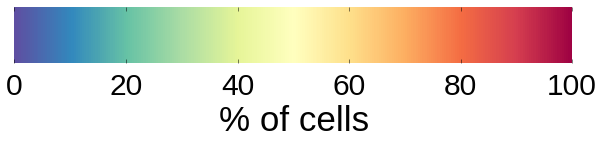

In [142]:
cmap = plt.cm.Spectral_r

#initialize figure

height = 1
width = 10

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#draw

axLabel = plt.subplot()

for pos in np.arange(0.0, 1.0, 0.001):
    axLabel.axvspan(pos, pos + 0.001, color = cmap(pos))
    
clean_axis(axLabel)

axLabel.set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
axLabel.set_xticklabels(['0', '20', '40', '60', '80', '100'], family = 'Liberation Sans', fontsize = 30)
    
plt.rcParams['xtick.major.pad'] = 10

axLabel.set_xlabel('% of cells', family = 'Liberation Sans', fontsize = 35)
axLabel.xaxis.set_label_coords(0.5, -0.75)


figname = 'v1.8_S6_B_Cell_number_legend.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

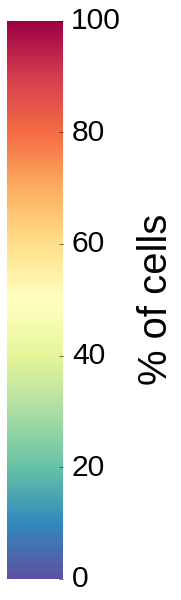

In [290]:
cmap = plt.cm.Spectral_r

#initialize figure

height = 10
width = 1

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#draw

axLabel = plt.subplot()

axLabel.set_ylim(0, 1)

for pos in np.arange(0.0, 1.0, 0.001):
    axLabel.axhspan(pos, pos + 0.001, color = cmap(pos))

axLabel.xaxis.set_ticks([])
axLabel.yaxis.set_ticks_position('right')

clean_axis(axLabel)

axLabel.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
axLabel.set_yticklabels(['0', '20', '40', '60', '80', '100'], family = 'Liberation Sans', fontsize = 30, va = 'center')
axLabel.tick_params(axis='y', which='major', pad=10)

axLabel.set_ylabel('% of cells', family = 'Liberation Sans', fontsize = 40)
axLabel.yaxis.set_label_coords(3, 0.5)

# Basal vs. suprabasal cells

In [343]:
data = cells_SC
PT = PT_corr_max
genes = ['Lgr5','Cd34','Gli1','Lgr6','Lrig1','Krt14']

SC_count = pd.DataFrame(index = genes, columns = ['all','basal','suprabasal'])

for g in genes:
    
    ix_tmp = data.ix[g][data.ix[g]==1].index
    
    SC_count.ix[g,'all'] = len(ix_tmp)
    SC_count.ix[g,'basal'] = len(PT[ix_tmp][PT[ix_tmp]<=300].index)
    SC_count.ix[g,'suprabasal'] = len(PT[ix_tmp][PT[ix_tmp]>300].index)

In [374]:
def circle_radius(n, factor=0.01):
    
    A = n * factor
    
    return np.sqrt((A/np.pi))

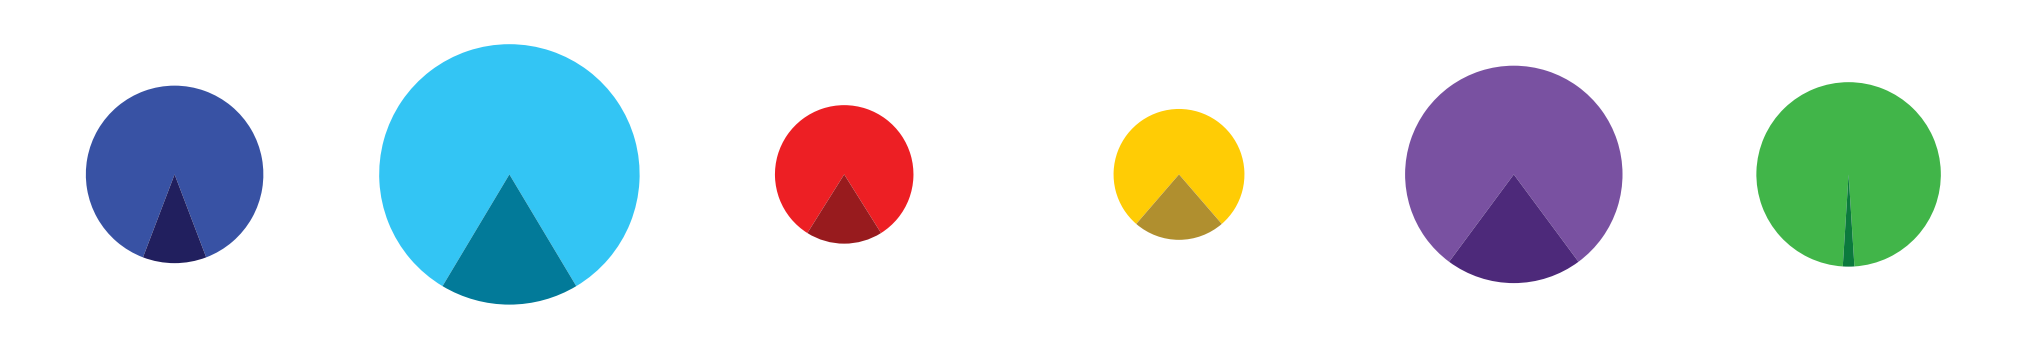

In [377]:
data = SC_count
genes = ['Lgr5','Cd34','Gli1','Lgr6','Lrig1','Krt14']
colors =  [('#3852A4','#211F5E'),
          ('#33C5F4','#027A99'),
          ('#ED1F24','#981B1E'),
          ('#FFCC05','#B08F2F'),
          ('#7951A1','#4D297A'),
          ('#41B549','#0B7A3D')]

#initialize figure

height = 6
width = 6 * len(genes)

fig = plt.figure(facecolor = 'w', figsize = (width, height))

gs = plt.GridSpec(1, len(genes), hspace=0.00, wspace=0.00)

#generate pie plot

for pos, g in enumerate(genes):

    ax = plt.subplot(gs[0,pos])
    
    clean_axis(ax)
    
    ax.pie(x = [data.ix[g,'basal'],data.ix[g,'suprabasal']],
           colors=[colors[pos][0],colors[pos][1]], 
           startangle=-90 + (float(data.ix[g,'suprabasal'])/data.ix[g,'all']) * 180, 
           wedgeprops = {'linewidth':0}, radius = circle_radius(data.ix[g,'all']))
    
figname = 'v1.8_6_B_SCs_Basal_suprabasal.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

In [361]:
basal_count = pd.Series(index = ['all','SC marker', 'no SC marker'])

ix_SC = set(cells_SC.sum()[cells_SC.sum()>0].index)
ix_basal = set(s_groups_basal[s_groups_basal!=7].index)

basal_count['all'] = len(ix_basal)
basal_count['SC marker'] = len(ix_basal & ix_SC)
basal_count['no SC marker'] = len(ix_basal - ix_SC)

In [388]:
basal_count

all             673
SC marker       491
no SC marker    182
dtype: float64

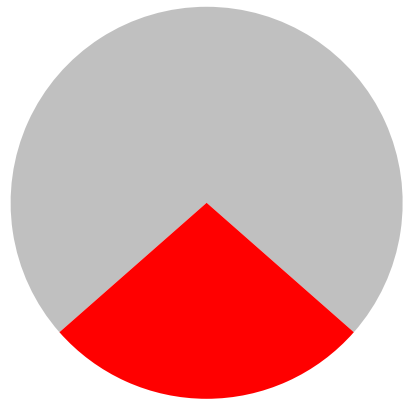

In [378]:
data = basal_count

#initialize figure

height = 6
width = 6

fig = plt.figure(facecolor = 'w', figsize = (width, height))

gs = plt.GridSpec(1, 1, hspace=0.00, wspace=0.00)

#generate pie plot

ax = plt.subplot(gs[0])
    
clean_axis(ax)
    
ax.pie(x = [data.ix['SC marker'],data.ix['no SC marker']],
           colors=['silver','red'], 
           startangle=-90 + (float(data.ix['no SC marker'])/data.ix['all']) * 180, 
           wedgeprops = {'linewidth':0}, radius = circle_radius(data.ix['all']))

figname = 'v1.8_6_C_Basal_cell_SC_marker.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# Stem cell markers projected onto basal t-SNE plot


Calculating binary logarithm of x + 1


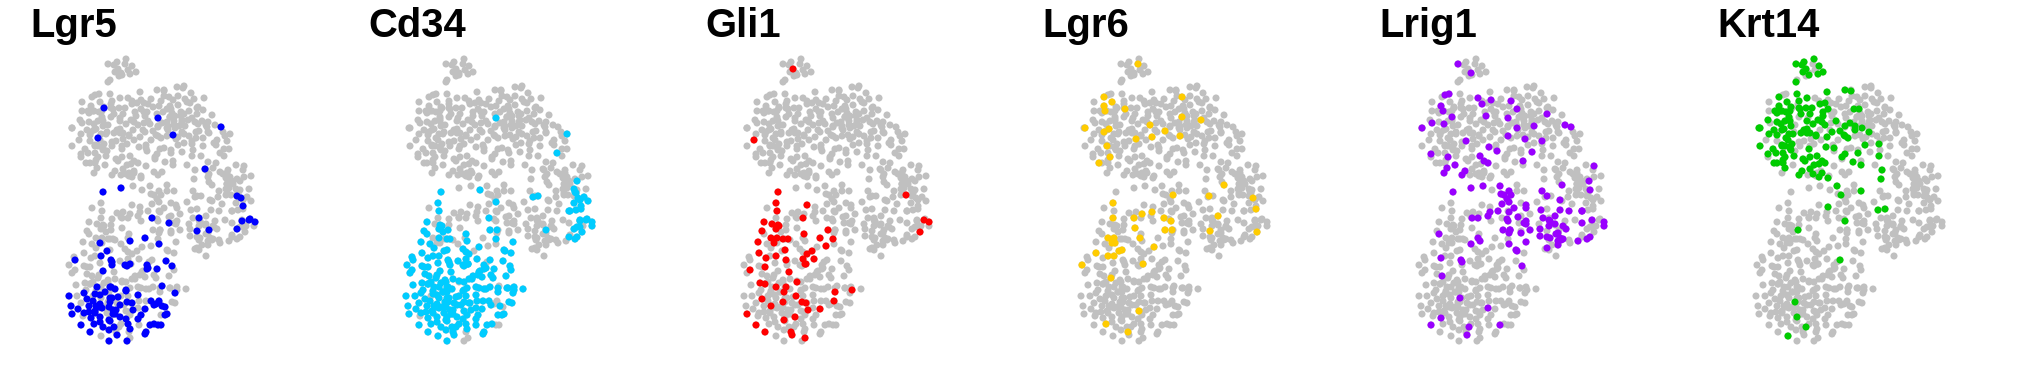

In [50]:
dataset = log2Transform(seq)
tsne = tsne_basal
cmap = plt.cm.seismic

#initialize figure

height = 6
width = 36

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#define x- and y-limits

x_min, x_max = np.min(tsne['x']), np.max(tsne['x'])
y_min, y_max = np.min(tsne['y']), np.max(tsne['y'])
x_diff, y_diff = x_max - x_min, y_max - y_min

pad = 5.0

if x_diff > y_diff:
    xlim = (x_min - pad, x_max + pad)
    ylim = (y_min * (x_diff / y_diff) - pad, y_max * (x_diff / y_diff) + pad)

if x_diff < y_diff:
    xlim = (x_min * (y_diff/x_diff) - pad, x_max * (y_diff/x_diff) + pad)
    ylim = (y_min - pad, y_max + pad)

text_pad = 5

#draw Lgr5 - binarization

g = 'Lgr5'

ax0 = plt.subplot2grid((1,6), (0,0))

ax0.set_xlim(xlim[0], xlim[1])
ax0.set_ylim(ylim[0], ylim[1])

remove_ticks(ax0)

ix_sel = cells_SC.ix[g][cells_SC.ix[g]==1].index

ax0.scatter(tsne['x'],
            tsne['y'], 
            s = 50,
            linewidth = 0.0,
            c = 'silver',
            edgecolor = 'silver')

ax0.scatter(tsne.ix[ix_sel, 'x'],
            tsne.ix[ix_sel, 'y'], 
            s = 50,
            linewidth = 0.0,
            c = cmap_SC[g],
            edgecolor = cmap_SC[g])

ax0.text(ax0.get_xlim()[0] + text_pad,
         ax0.get_ylim()[1] + text_pad,
         g,
         family = 'Liberation Sans', fontsize = 40, va = 'top', weight = 'bold')

clean_axis(ax0)


#draw Cd34 - binarization

g = 'Cd34'

ax0 = plt.subplot2grid((1,6), (0,1))

ax0.set_xlim(xlim[0], xlim[1])
ax0.set_ylim(ylim[0], ylim[1])

remove_ticks(ax0)

ix_sel = cells_SC.ix[g][cells_SC.ix[g]==1].index

ax0.scatter(tsne['x'],
            tsne['y'], 
            s = 50,
            linewidth = 0.0,
            c = 'silver',
            edgecolor = 'silver')

ax0.scatter(tsne.ix[ix_sel, 'x'],
            tsne.ix[ix_sel, 'y'], 
            s = 50,
            linewidth = 0.0,
            c = cmap_SC[g],
            edgecolor = cmap_SC[g])

ax0.text(ax0.get_xlim()[0] + text_pad,
         ax0.get_ylim()[1] + text_pad,
         g,
         family = 'Liberation Sans', fontsize = 40, va = 'top', weight = 'bold')

clean_axis(ax0)


#draw Gli1 - binarization

g = 'Gli1'

ax0 = plt.subplot2grid((1,6), (0,2))

ax0.set_xlim(xlim[0], xlim[1])
ax0.set_ylim(ylim[0], ylim[1])

remove_ticks(ax0)

ix_sel = cells_SC.ix[g][cells_SC.ix[g]==1].index

ax0.scatter(tsne['x'],
            tsne['y'], 
            s = 50,
            linewidth = 0.0,
            c = 'silver',
            edgecolor = 'silver')

ax0.scatter(tsne.ix[ix_sel, 'x'],
            tsne.ix[ix_sel, 'y'], 
            s = 50,
            linewidth = 0.0,
            c = cmap_SC[g],
            edgecolor = cmap_SC[g])

ax0.text(ax0.get_xlim()[0] + text_pad,
         ax0.get_ylim()[1] + text_pad,
         g,
         family = 'Liberation Sans', fontsize = 40, va = 'top', weight = 'bold')

clean_axis(ax0)

#draw Lgr6 - binarization

g = 'Lgr6'

ax0 = plt.subplot2grid((1,6), (0,3))

ax0.set_xlim(xlim[0], xlim[1])
ax0.set_ylim(ylim[0], ylim[1])

remove_ticks(ax0)

ix_sel = cells_SC.ix[g][cells_SC.ix[g]==1].index

ax0.scatter(tsne['x'],
            tsne['y'], 
            s = 50,
            linewidth = 0.0,
            c = 'silver',
            edgecolor = 'silver')

ax0.scatter(tsne.ix[ix_sel, 'x'],
            tsne.ix[ix_sel, 'y'], 
            s = 50,
            linewidth = 0.0,
            c = cmap_SC[g],
            edgecolor = cmap_SC[g])

ax0.text(ax0.get_xlim()[0] + text_pad,
         ax0.get_ylim()[1] + text_pad,
         g,
         family = 'Liberation Sans', fontsize = 40, va = 'top', weight = 'bold')

clean_axis(ax0)


#draw Lrig1 - binarization

g = 'Lrig1'

ax0 = plt.subplot2grid((1,6), (0,4))

ax0.set_xlim(xlim[0], xlim[1])
ax0.set_ylim(ylim[0], ylim[1])

remove_ticks(ax0)

ix_sel = cells_SC.ix[g][cells_SC.ix[g]==1].index

ax0.scatter(tsne['x'],
            tsne['y'], 
            s = 50,
            linewidth = 0.0,
            c = 'silver',
            edgecolor = 'silver')

ax0.scatter(tsne.ix[ix_sel, 'x'],
            tsne.ix[ix_sel, 'y'], 
            s = 50,
            linewidth = 0.0,
            c = cmap_SC[g],
            edgecolor = cmap_SC[g])

ax0.text(ax0.get_xlim()[0] + text_pad,
         ax0.get_ylim()[1] + text_pad,
         g,
         family = 'Liberation Sans', fontsize = 40, va = 'top', weight = 'bold')

clean_axis(ax0)

#draw Krt14 - binarization

g = 'Krt14'

ax0 = plt.subplot2grid((1,6), (0,5))

ax0.set_xlim(xlim[0], xlim[1])
ax0.set_ylim(ylim[0], ylim[1])

remove_ticks(ax0)

ix_sel = cells_SC.ix[g][cells_SC.ix[g]==1].index

ax0.scatter(tsne['x'],
            tsne['y'], 
            s = 50,
            linewidth = 0.0,
            c = 'silver',
            edgecolor = 'silver')

ax0.scatter(tsne.ix[ix_sel, 'x'],
            tsne.ix[ix_sel, 'y'], 
            s = 50,
            linewidth = 0.0,
            c = cmap_SC[g],
            edgecolor = cmap_SC[g])

ax0.text(ax0.get_xlim()[0] + text_pad,
         ax0.get_ylim()[1] + text_pad,
         g,
         family = 'Liberation Sans', fontsize = 40, va = 'top', weight = 'bold')

clean_axis(ax0)


plt.subplots_adjust(wspace = 0.05, hspace = 0.00)

figname = 'v1.8_6_D_tSNE_SC_markers.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

## Compartments projected onto t-SNE plot

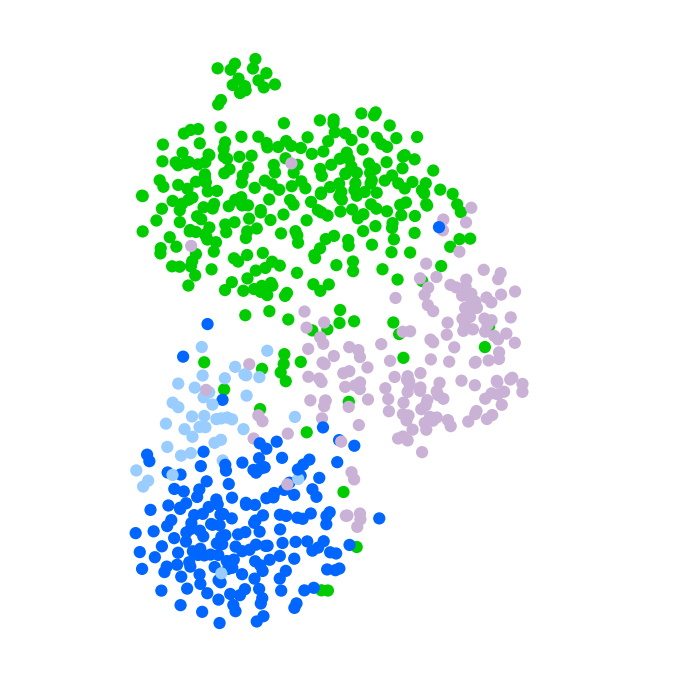

In [68]:
tsne = tsne_basal

#define clist

clist = []

for ix in tsne.index:
    if s_groups_2nd[ix] in [0,1,2,3,4,6]:
        clist.append('#00CC00')
    elif s_groups_2nd[ix] in [7,8,9,10,11,12,13, 18]:
        clist.append('#cab2d6')
    elif s_groups_2nd[ix] in [17]:
        clist.append('#99CCFF')
    elif s_groups_2nd[ix] in [15,16,19,20,21,22]:
        clist.append('#0066FF')

#initialize figure

height = 12
width = 12

fig = plt.figure(facecolor = 'w', figsize = (width, height))

ix_sel = [ix for ix in s_groups_basal.index if cells_SC[ix].sum()==0]
np.random.shuffle(ix_sel)

#define x- and y-limits

x_min, x_max = np.min(tsne['x']), np.max(tsne['x'])
y_min, y_max = np.min(tsne['y']), np.max(tsne['y'])
x_diff, y_diff = x_max - x_min, y_max - y_min

pad = 5.0

if x_diff > y_diff:
    xlim = (x_min - pad, x_max + pad)
    ylim = (y_min * (x_diff / y_diff) - pad, y_max * (x_diff / y_diff) + pad)

if x_diff < y_diff:
    xlim = (x_min * (y_diff/x_diff) - pad, x_max * (y_diff/x_diff) + pad)
    ylim = (y_min - pad, y_max + pad)

text_pad = 5

#draw 1st level clustering

ax0 = plt.subplot()

ax0.set_xlim(xlim[0], xlim[1])
ax0.set_ylim(ylim[0], ylim[1])

remove_ticks(ax0)

ax0.scatter(tsne['x'],
            tsne['y'], 
            s = 150,
            linewidth = 0.0,
            c = clist,
            edgecolor = clist)
"""
ax0.text(ax0.get_xlim()[0] + text_pad,
         ax0.get_ylim()[1] + text_pad,
         'Epidermal compartments',
         family = 'Liberation Sans', fontsize = 35, va = 'top', weight = 'bold')
"""         


clean_axis(ax0)

figname = 'v1.8_6_D_Compartments.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

## Pseudotime-cutoff projected onto t-SNE plot

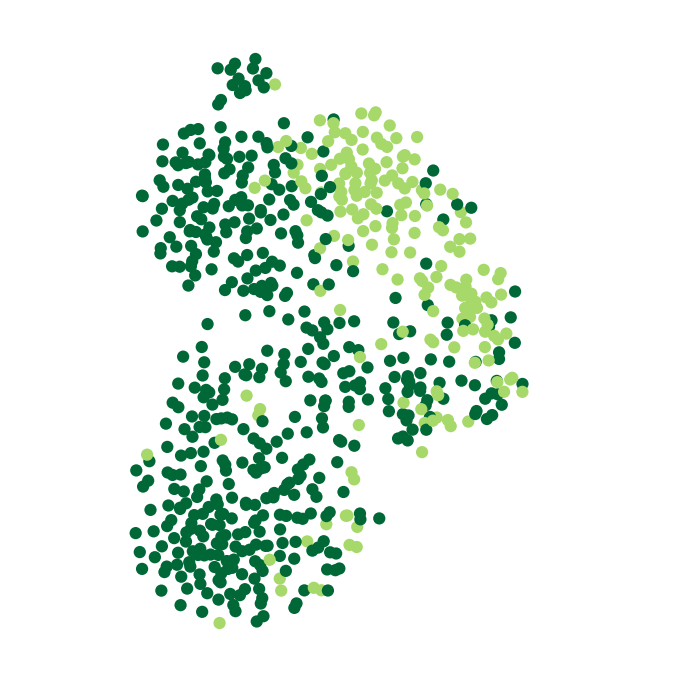

In [67]:
tsne = tsne_basal

#define clist

clist = []

for ix in tsne.index:
    if PT_corr_max.ix[ix] < 150:
        clist.append('#006837')
    else:
        clist.append('#a6d96a')

#initialize figure

height = 12
width = 12

fig = plt.figure(facecolor = 'w', figsize = (width, height))

ix_sel = [ix for ix in s_groups_basal.index if cells_SC[ix].sum()==0]
np.random.shuffle(ix_sel)

#define x- and y-limits

x_min, x_max = np.min(tsne['x']), np.max(tsne['x'])
y_min, y_max = np.min(tsne['y']), np.max(tsne['y'])
x_diff, y_diff = x_max - x_min, y_max - y_min

pad = 5.0

if x_diff > y_diff:
    xlim = (x_min - pad, x_max + pad)
    ylim = (y_min * (x_diff / y_diff) - pad, y_max * (x_diff / y_diff) + pad)

if x_diff < y_diff:
    xlim = (x_min * (y_diff/x_diff) - pad, x_max * (y_diff/x_diff) + pad)
    ylim = (y_min - pad, y_max + pad)

text_pad = 5

#draw 1st level clustering

ax0 = plt.subplot()

ax0.set_xlim(xlim[0], xlim[1])
ax0.set_ylim(ylim[0], ylim[1])

remove_ticks(ax0)

ax0.scatter(tsne['x'],
            tsne['y'], 
            s = 150,
            linewidth = 0.0,
            c = clist,
            edgecolor = clist)
"""
ax0.text(ax0.get_xlim()[0] + text_pad,
         ax0.get_ylim()[1] + text_pad,
         'Differentiation status',
         family = 'Liberation Sans', fontsize = 35, va = 'top', weight = 'bold')
"""

clean_axis(ax0)

figname = 'v1.8_6_D_Differentiation.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

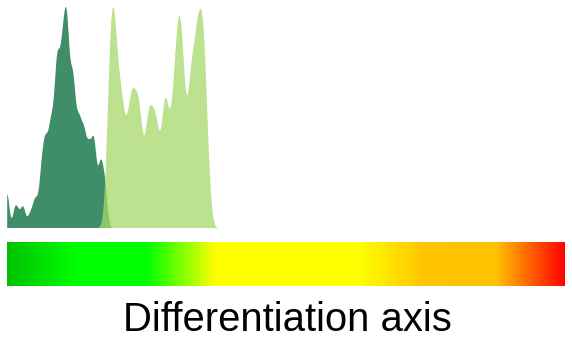

In [585]:
ax_scale = 1.0

#initialize figure

height = 5
width = 10
    
fig = plt.figure(facecolor = 'w', figsize = (width, height))

#initialize GridSpec

gs = plt.GridSpec(2, 1, hspace=0.1, wspace = 0.1, height_ratios=[5, 1])

#plot KDEs

ax = plt.subplot(gs[0])

ax.set_xlim(0, np.max(PTO_coords_IFE.max(), 0))

#plot early basal

ix_tmp = [ix for ix in tsne_basal.index if PT_corr_max.ix[ix] < 150]
pos_tmp = PT_corr_max_sel[ix_tmp].astype(float)

kde_tmp = scipy.stats.gaussian_kde(pos_tmp)
kde_x = list(np.arange(0, np.max(PTO_coords_IFE.max())))
kde_tmp.set_bandwidth(0.1)
kde_y_tmp = kde_tmp.evaluate(kde_x)
    
kde_x_tmp = [0] + list(np.arange(0, np.max(PTO_coords_IFE.max()))) + [np.max(PTO_coords_IFE.max())]
kde_y_tmp = [0] + [float(x) / np.max(kde_y_tmp) for x in kde_y_tmp] + [0]
    
ax.fill(kde_x_tmp, kde_y_tmp, linewidth = 0, color = '#006837', alpha = 0.75)

#plot late basal

ix_tmp = [ix for ix in tsne_basal.index if PT_corr_max.ix[ix] >= 150]
pos_tmp = PT_corr_max_sel[ix_tmp].astype(float)

kde_tmp = scipy.stats.gaussian_kde(pos_tmp)
kde_x = list(np.arange(0, np.max(PTO_coords_IFE.max())))
kde_tmp.set_bandwidth(0.1)
kde_y_tmp = kde_tmp.evaluate(kde_x)
    
kde_x_tmp = [0] + list(np.arange(0, np.max(PTO_coords_IFE.max()))) + [np.max(PTO_coords_IFE.max())]
kde_y_tmp = [0] + [float(x) / np.max(kde_y_tmp) for x in kde_y_tmp] + [0]
    
ax.fill(kde_x_tmp, kde_y_tmp, linewidth = 0, color = '#a6d96a', alpha = 0.75)
    
clean_axis(ax)

#Colorbar

ax = plt.subplot(gs[1])

ax.set_xlim(0, np.max(PTO_coords_IFE.max()))

for pos in np.arange(0, np.max(PTO_coords_IFE.max(), 0)):
    ax.axvspan(pos, pos + 1, color = cmap_Gn_Yl_Rd(pos / np.max(np.max(PTO_coords_IFE.max(), 0))))
               
ax.set_xlabel('Differentiation axis', family = 'Liberation Sans', fontsize = 40, labelpad = 15)

clean_axis(ax)

figname = 'v1.8_6_D_Differentiation_pseudotime_axis.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

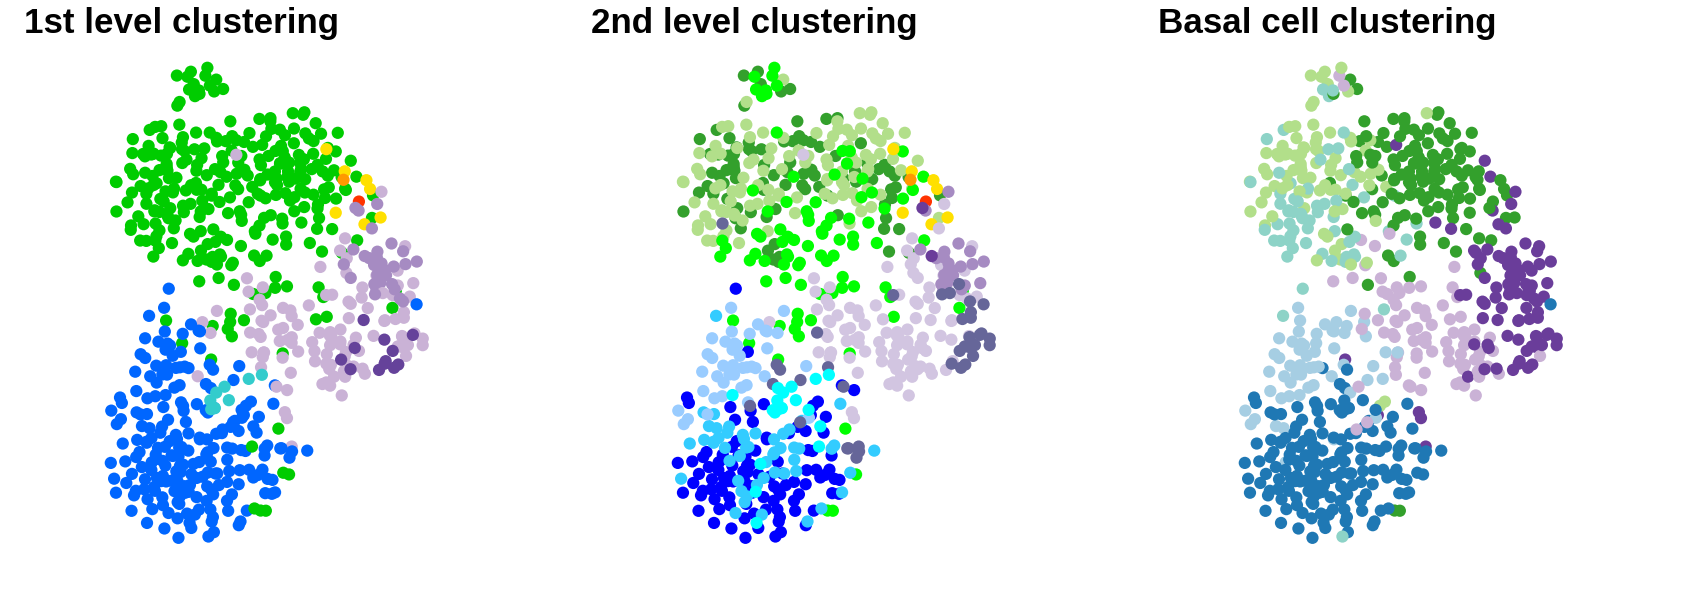

In [119]:
tsne = tsne_basal

#initialize figure

height = 10
width = 30

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#define x- and y-limits

x_min, x_max = np.min(tsne['x']), np.max(tsne['x'])
y_min, y_max = np.min(tsne['y']), np.max(tsne['y'])
x_diff, y_diff = x_max - x_min, y_max - y_min

pad = 5.0

if x_diff > y_diff:
    xlim = (x_min - pad, x_max + pad)
    ylim = (y_min * (x_diff / y_diff) - pad, y_max * (x_diff / y_diff) + pad)

if x_diff < y_diff:
    xlim = (x_min * (y_diff/x_diff) - pad, x_max * (y_diff/x_diff) + pad)
    ylim = (y_min - pad, y_max + pad)

text_pad = 2

#draw 1st level clustering

ax0 = plt.subplot2grid((1,3), (0,0))

ax0.set_xlim(xlim[0], xlim[1])
ax0.set_ylim(ylim[0], ylim[1])

remove_ticks(ax0)

ax0.scatter(tsne['x'],
            tsne['y'], 
            s = 150,
            linewidth = 0.0,
            c = [cmap_1st[s_groups_1st[ix]] for ix in tsne.index],
            edgecolor = [cmap_1st[s_groups_1st[ix]] for ix in tsne.index])

ax0.text(ax0.get_xlim()[0] + text_pad,
         ax0.get_ylim()[1] + text_pad,
         '1st level clustering',
         family = 'Liberation Sans', fontsize = 35, va = 'top', weight = 'bold')

clean_axis(ax0)

#draw 2nd level clustering

ax0 = plt.subplot2grid((1,3), (0,1))

ax0.set_xlim(xlim[0], xlim[1])
ax0.set_ylim(ylim[0], ylim[1])

remove_ticks(ax0)

ax0.scatter(tsne['x'],
            tsne['y'], 
            s = 150,
            linewidth = 0.0,
            c = [cmap_2nd[s_groups_2nd[ix]] for ix in tsne.index],
            edgecolor = [cmap_2nd[s_groups_2nd[ix]] for ix in tsne.index])

ax0.text(ax0.get_xlim()[0] + text_pad,
         ax0.get_ylim()[1] + text_pad,
         '2nd level clustering',
         family = 'Liberation Sans', fontsize = 35, va = 'top', weight = 'bold')

clean_axis(ax0)

#draw stem cell subclustering

ax0 = plt.subplot2grid((1,3), (0,2))

ax0.set_xlim(xlim[0], xlim[1])
ax0.set_ylim(ylim[0], ylim[1])

remove_ticks(ax0)

ax0.scatter(tsne['x'],
            tsne['y'], 
            s = 150,
            linewidth = 0.0,
            c = [cmap_basal[s_groups_basal[ix]] for ix in tsne.index],
            edgecolor = [cmap_basal[s_groups_basal[ix]] for ix in tsne.index])

ax0.text(ax0.get_xlim()[0] + text_pad,
         ax0.get_ylim()[1] + text_pad,
         'Basal cell clustering',
         family = 'Liberation Sans', fontsize = 35, va = 'top', weight = 'bold')

clean_axis(ax0)

plt.subplots_adjust(wspace = 0.05, hspace = 0.05)

figname = 'v1.8_S6_C_t-SNE_basal_clustering.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)


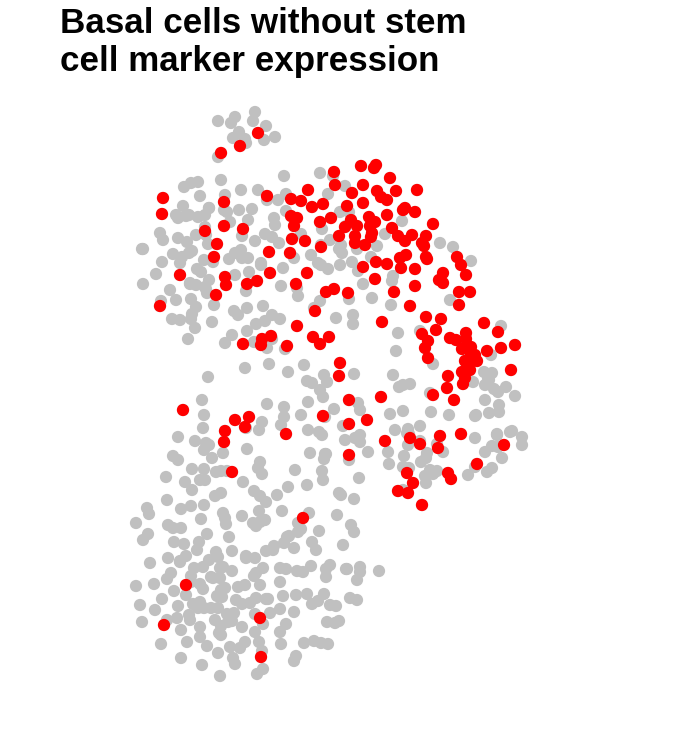

In [385]:
tsne = tsne_basal

#initialize figure

height = 12
width = 12

fig = plt.figure(facecolor = 'w', figsize = (width, height))

ix_sel = [ix for ix in s_groups_basal.index if cells_SC[ix].sum()==0]
np.random.shuffle(ix_sel)

#define x- and y-limits

x_min, x_max = np.min(tsne['x']), np.max(tsne['x'])
y_min, y_max = np.min(tsne['y']), np.max(tsne['y'])
x_diff, y_diff = x_max - x_min, y_max - y_min

pad = 5.0

if x_diff > y_diff:
    xlim = (x_min - pad, x_max + pad)
    ylim = (y_min * (x_diff / y_diff) - pad, y_max * (x_diff / y_diff) + pad)

if x_diff < y_diff:
    xlim = (x_min * (y_diff/x_diff) - pad, x_max * (y_diff/x_diff) + pad)
    ylim = (y_min - pad, y_max + pad)

text_pad = 5

#draw 1st level clustering

ax0 = plt.subplot()

ax0.set_xlim(xlim[0], xlim[1])
ax0.set_ylim(ylim[0], ylim[1])

remove_ticks(ax0)

ax0.scatter(tsne['x'],
            tsne['y'], 
            s = 150,
            linewidth = 0.0,
            c = 'silver',
            edgecolor = 'silver')

ax0.scatter(tsne.ix[ix_sel,'x'],
            tsne.ix[ix_sel,'y'], 
            s = 150,
            linewidth = 0.0,
            c = 'red',
            edgecolor = 'red')

ax0.text(ax0.get_xlim()[0] + text_pad,
         ax0.get_ylim()[1] + text_pad,
         'Basal cells without stem\ncell marker expression',
         family = 'Liberation Sans', fontsize = 35, va = 'top', weight = 'bold')

clean_axis(ax0)

figname = 'v1.8_6_E_tSNE_no_SC_markers.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

In [905]:
ix_tmp = [ix for ix in tsne_basal.index if cells_SC[ix].sum()>0]
seq.ix['Col17a1',ix_tmp].median()

13.0

In [906]:
ix_tmp = [ix for ix in tsne_basal.index if cells_SC[ix].sum()==0]
seq.ix['Col17a1',ix_tmp].median()

8.0

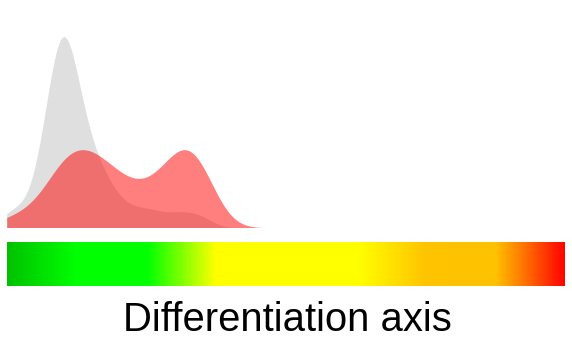

In [757]:
ax_scale = 1.0

#initialize figure

height = 5
width = 10
    
fig = plt.figure(facecolor = 'w', figsize = (width, height))

#initialize GridSpec

gs = plt.GridSpec(2, 1, hspace=0.1, wspace = 0.1, height_ratios=[5, 1])

#plot KDEs

ax = plt.subplot(gs[0])

ax.set_xlim(0, np.max(PTO_coords_IFE.max(), 0))

#plot SC

ix_tmp = [ix for ix in tsne_basal.index if cells_SC[ix].sum()>0]
pos_tmp = PT_corr_max_sel[ix_tmp].astype(float)

kde_tmp = scipy.stats.gaussian_kde(pos_tmp)
kde_x = list(np.arange(0, np.max(PTO_coords_IFE.max())))
#kde_tmp.set_bandwidth(0.1)
kde_y_tmp = kde_tmp.evaluate(kde_x)
    
kde_x_tmp = [0] + list(np.arange(0, np.max(PTO_coords_IFE.max()))) + [np.max(PTO_coords_IFE.max())]
kde_y_tmp = [0] + [float(x) for x in kde_y_tmp] + [0]
    
ax.fill(kde_x_tmp, kde_y_tmp, linewidth = 0, color = 'silver', alpha = 0.5)

#plot no SC

ix_tmp = [ix for ix in tsne_basal.index if cells_SC[ix].sum()==0]
pos_tmp = PT_corr_max_sel[ix_tmp].astype(float)

kde_tmp = scipy.stats.gaussian_kde(pos_tmp)
kde_x = list(np.arange(0, np.max(PTO_coords_IFE.max())))
#kde_tmp.set_bandwidth(0.1)
kde_y_tmp = kde_tmp.evaluate(kde_x)
    
kde_x_tmp = [0] + list(np.arange(0, np.max(PTO_coords_IFE.max()))) + [np.max(PTO_coords_IFE.max())]
kde_y_tmp = [0] + [float(x) for x in kde_y_tmp] + [0]
    
ax.fill(kde_x_tmp, kde_y_tmp, linewidth = 0, color = 'red', alpha = 0.5)
    
clean_axis(ax)

#Colorbar

ax = plt.subplot(gs[1])

ax.set_xlim(0, np.max(PTO_coords_IFE.max()))

for pos in np.arange(0, np.max(PTO_coords_IFE.max(), 0)):
    ax.axvspan(pos, pos + 1, color = cmap_Gn_Yl_Rd(pos / np.max(np.max(PTO_coords_IFE.max(), 0))))
               
ax.set_xlabel('Differentiation axis', family = 'Liberation Sans', fontsize = 40, labelpad = 15)

clean_axis(ax)

figname = 'v1.8_6_D_SC_no_SC_pseudotime_axis.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

## Legends

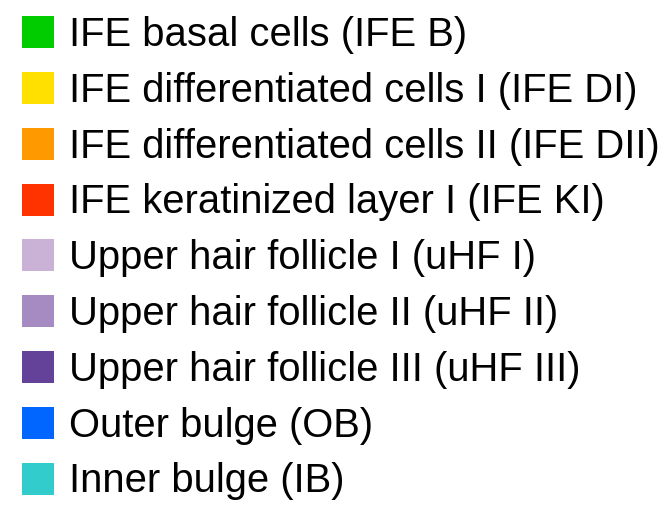

In [151]:
#initialize figure

group_list = [2,1,8,0,6,3,4,7,9]

width = 11
height = 9

fig = plt.figure(facecolor = 'w', figsize = (width, height))

gs = plt.GridSpec(1,1)

ax0 = fig.add_subplot(gs[0])
ax0.set_ylim(len(group_list) -0.5, -0.5)
ax0.set_xlim(0, 1)

x = 0.05

for pos in range(len(group_list)):      
    
    ax0.scatter(x, pos-0.04, c = cmap_1st[group_list[pos]], marker = 's', vmin = 0, vmax = 1.0, s = 1000, 
                linewidth = 0.0)
        
    ax0.text(x + 0.05, pos, nmap_1st[group_list[pos]], family = 'Liberation Sans', fontsize = 40, va = 'center', ha = 'left')
    
    #ax0.text(x + 0.05, pos + 0.4, Genemap_1st[group_list[pos]], fontsize = 30, family = 'Liberation Sans', va = 'center', ha = 'left',
             #fontstyle = 'italic')
    
clean_axis(ax0)

figname = 'v1.8_S6_C_Legend_1st_level_clustering.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

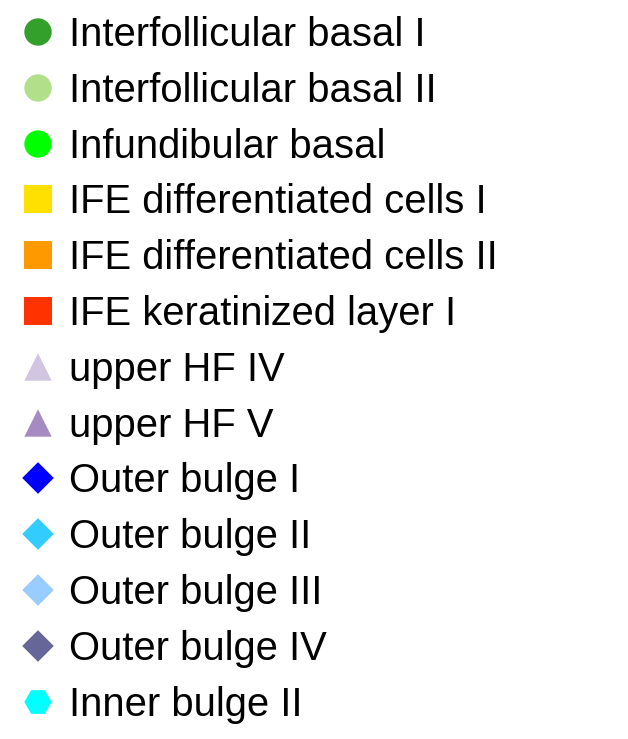

In [152]:
#initialize figure

group_list = [0,1,2,3,4,5,10,11,15,16,17,18,21]

width = 11
height = 13

fig = plt.figure(facecolor = 'w', figsize = (width, height))

gs = plt.GridSpec(1,1)

ax0 = fig.add_subplot(gs[0])
ax0.set_ylim(len(group_list) -0.5, -0.5)
ax0.set_xlim(0, 1)

x = 0.05

for pos, ix in enumerate(group_list):      
    
    ax0.scatter(x, pos-0.04, c = cmap_2nd[ix], marker = markers_2nd[ix], s = markers_2nd_size[ix], 
                linewidth = 0.0)
        
    ax0.text(x + 0.05, pos, nmap_2nd[ix], family = 'Liberation Sans', fontsize = 40, va = 'center', ha = 'left')
    
clean_axis(ax0)

figname = 'v1.8_S6_C_Legend_2nd_level_clustering.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

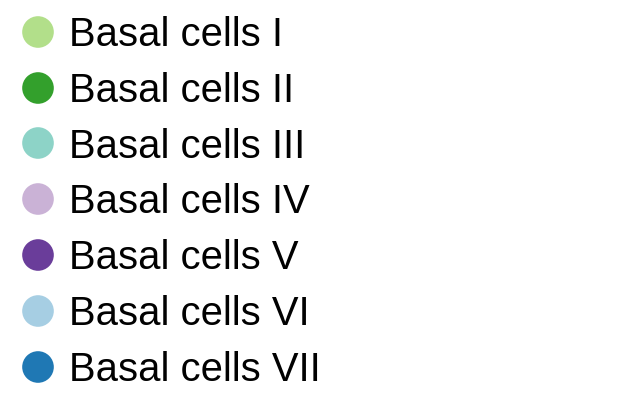

In [153]:
#initialize figure

width = 11
height = 7

fig = plt.figure(facecolor = 'w', figsize = (width, height))

gs = plt.GridSpec(1,1)

ax0 = fig.add_subplot(gs[0])
ax0.set_ylim(6.5, -0.5)
ax0.set_xlim(0, 1)

group_list = [1,0,2,3,4,6,5]

x = 0.05

for pos, ix in enumerate(group_list):      
    
    ax0.scatter(x, pos-0.04, c = cmap_basal[ix], marker = 'o', vmin = 0, vmax = 1.0, s = 1000, 
                linewidth = 0.0)
        
    ax0.text(x + 0.05, pos, nmap_basal[ix], family = 'Liberation Sans', fontsize = 40, va = 'center', ha = 'left')
    
    
clean_axis(ax0)

figname = 'v1.8_S6_C_Legend_basal_clustering.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# Negative binominal regression

## Load Data

In [300]:
NBR_SC_SC_basal_traces = loadData_from_pickle_v1(path_output, exp_id,'NBR_SC_SC_basal_traces')
NBR_SC_SC_basal_summary = loadData_from_pickle_v1(path_output, exp_id,'NBR_SC_SC_basal_summary')
NBR_SC_SC_basal_bin_bl = loadData_from_pickle_v1(path_output, exp_id,'NBR_SC_SC_basal_bin_bl')
NBR_SC_SC_basal_size_bl = loadData_from_pickle_v1(path_output, exp_id,'NBR_SC_SC_basal_size_bl')
NBR_SC_SC_basal_bin_gr = loadData_from_pickle_v1(path_output, exp_id,'NBR_SC_SC_basal_bin_gr')
NBR_SC_SC_basal_size_gr = loadData_from_pickle_v1(path_output, exp_id,'NBR_SC_SC_basal_size_gr')

In [301]:
NBR_SC_all_basal_traces = loadData_from_pickle_v1(path_output, exp_id,'NBR_SC_all_basal_traces')
NBR_SC_all_basal_summary = loadData_from_pickle_v1(path_output, exp_id,'NBR_SC_all_basal_summary')
NBR_SC_all_basal_bin_bl = loadData_from_pickle_v1(path_output, exp_id,'NBR_SC_all_basal_bin_bl')
NBR_SC_all_basal_size_bl = loadData_from_pickle_v1(path_output, exp_id,'NBR_SC_all_basal_size_bl')
NBR_SC_all_basal_bin_gr = loadData_from_pickle_v1(path_output, exp_id,'NBR_SC_all_basal_bin_gr')
NBR_SC_all_basal_size_gr = loadData_from_pickle_v1(path_output, exp_id,'NBR_SC_all_basal_size_gr')

# Stem cell population specific signatures

In [71]:
genes_SC_bl = neg_binom_extract_genes(NBR_SC_SC_basal_size_bl, score = 'percentile - 5', number = 10)

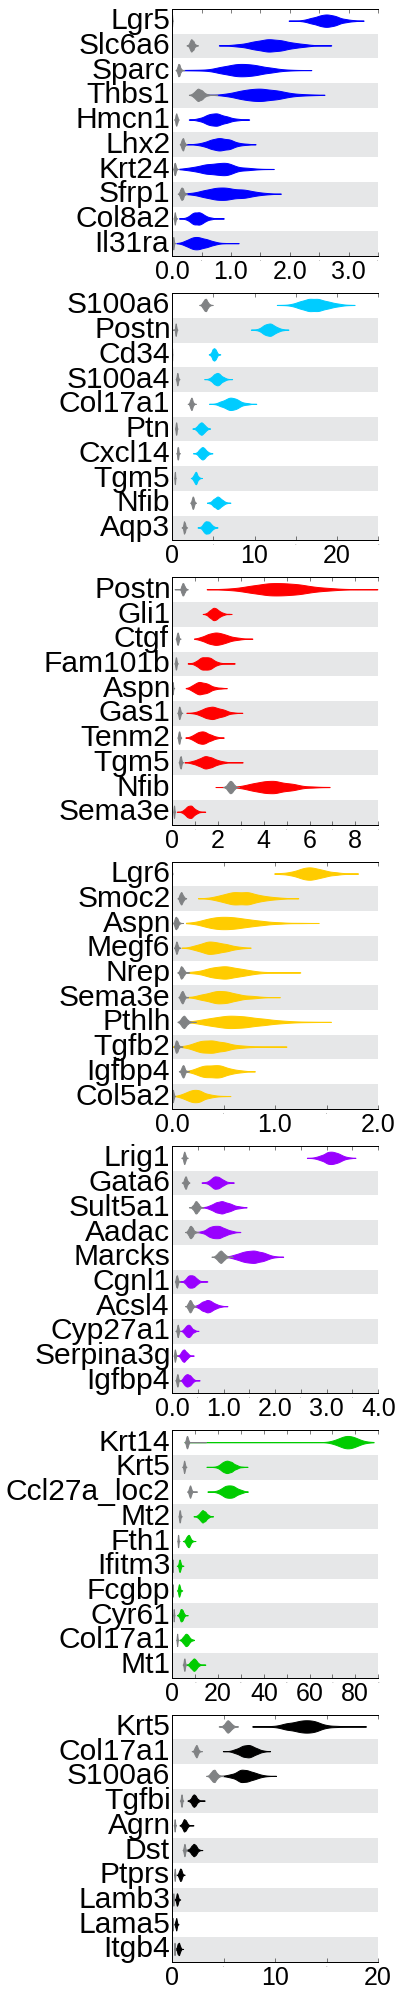

In [73]:
#define input variables

gr_order = ['Lgr5','Cd34','Gli1','Lgr6','Lrig1','Krt14','SC_basal']
genes = genes_SC_bl
L = len(genes.index)
traces = NBR_SC_SC_basal_traces
cmap = cmap_SC

#initialize figure

height = 5 * len(gr_order)
width = 6

plt.figure(facecolor = 'w', figsize = (width, height))
gs = plt.GridSpec(len(gr_order), 2, hspace = 0.15, wspace = 0.0, width_ratios = [5,8])

#iterate through groups

for pos, gr in enumerate(gr_order):
    
    genes_tmp = [gene for gene in genes[str(gr)].values if gene != None]
    
    #create gene name axis 
    
    ax0 = plt.subplot(gs[pos,0])
    ax0.set_ylim(L - 0.5, -0.5)
    clean_axis(ax0)
    
    #create violin plot axis
    
    ax1 = plt.subplot(gs[pos,1])
    
    ax1.spines['right'].set_color('none')

    ax1.set_ylim(L - 0.5, -0.5)
    ax1.yaxis.set_ticks_position('left')
    ax1.yaxis.set_ticks([])
    
    #iterate over genes
    
    for ix, g in enumerate(genes_tmp):
        ax0.text(0.975, ix, g, family = 'Liberation Sans', fontsize = 30, ha = 'right', va = 'center')
        
        #print background
        
        if ix % 2 == 0:
            ax1.axhspan(ix - 0.5, ix + 0.5, color = '#FFFFFF', zorder = 0)
            
        if ix % 2 == 1:
            ax1.axhspan(ix - 0.5, ix + 0.5, color = '#E6E7E8', zorder = 0)
            
        #print group traces
        
        violin = ax1.violinplot([x - 1 for x in traces.ix[g, str(gr)]],
                       positions = [ix],
                       vert=False,
                       showextrema=False)
        
        for v in violin['bodies']:
            v.set_edgecolor(cmap[gr])
            v.set_facecolor(cmap[gr])
            v.set_linewidth(1.0)
            v.set_alpha(1.0)
            
        #print baseline traces
        
        violin = ax1.violinplot([x - 1 for x in traces.ix[g, 'Baseline']],
                       positions = [ix],
                       vert=False,
                       showextrema=False)
        
        for v in violin['bodies']:
            v.set_edgecolor('#808284')
            v.set_facecolor('#808284')
            v.set_linewidth(1.0)
            v.set_alpha(1.0)

    for ix, t in enumerate(ax1.xaxis.get_ticklabels()):
        if ix % 2 == 0:
            t.set_family('Liberation Sans')
            t.set_fontsize(25)
        else:
            t.set_fontsize(0)

figname = 'v1.8_S6_F_SC_vs_Baseline.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

In [75]:
genes_SC_gr = neg_binom_extract_genes(NBR_SC_SC_basal_size_gr, score = 'percentile - 5', number = 10)

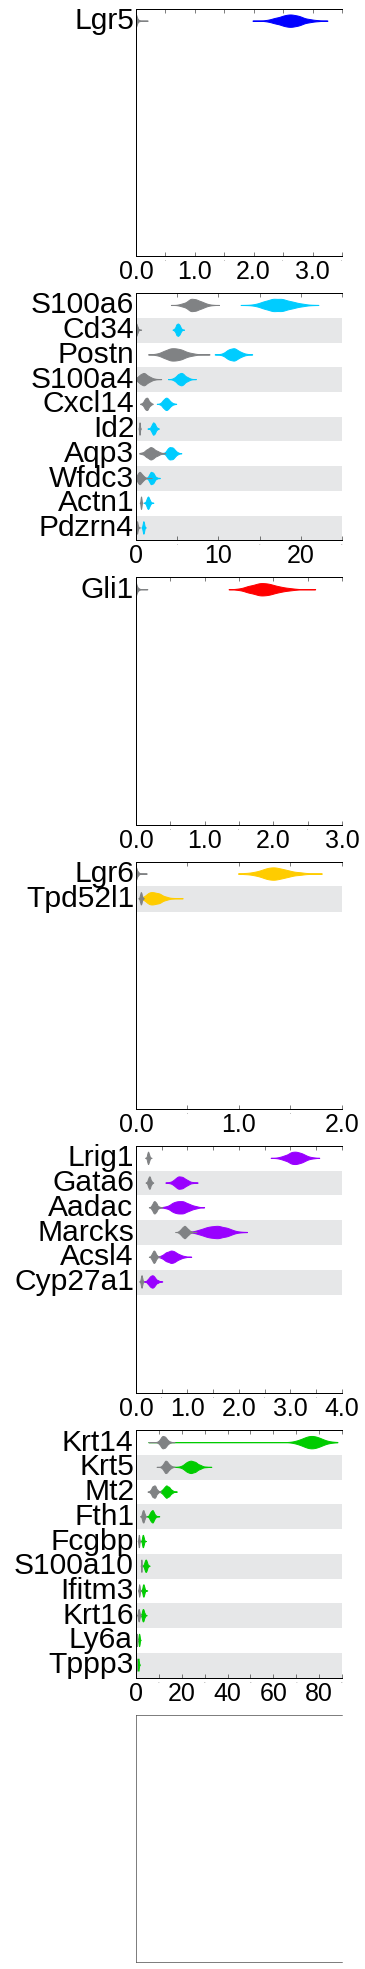

In [77]:
#define input variables

gr_order = ['Lgr5','Cd34','Gli1','Lgr6','Lrig1','Krt14','SC_basal']
genes = genes_SC_gr
L = len(genes.index)
traces = NBR_SC_SC_basal_traces
summary = NBR_SC_SC_basal_summary
cmap = cmap_SC

#initialize figure

height = 5 * len(gr_order)
width = 6

plt.figure(facecolor = 'w', figsize = (width, height))
gs = plt.GridSpec(len(gr_order), 2, hspace = 0.15, wspace = 0.0, width_ratios = [5,8])

#iterate through groups

for pos, gr in enumerate(gr_order):
    
    genes_tmp = [gene for gene in genes[str(gr)].values if pd.isnull(gene) == False]
    
    #create gene name axis 
    
    ax0 = plt.subplot(gs[pos,0])
    ax0.set_ylim(L - 0.5, -0.5)
    clean_axis(ax0)
    
    #create violin plot axis
    
    ax1 = plt.subplot(gs[pos,1])
    
    ax1.spines['right'].set_color('none')

    ax1.set_ylim(L - 0.5, -0.5)
    ax1.yaxis.set_ticks_position('left')
    ax1.yaxis.set_ticks([])
    
    if len(genes_tmp) == 0:
        
        remove_ticks(ax1)
    
    #iterate over genes
    
    for ix, g in enumerate(genes_tmp):
        ax0.text(0.975, ix, g, family = 'Liberation Sans', fontsize = 30, ha = 'right', va = 'center')
        
        #print background
        
        if ix % 2 == 0:
            ax1.axhspan(ix - 0.5, ix + 0.5, color = '#FFFFFF', zorder = 0)
            
        if ix % 2 == 1:
            ax1.axhspan(ix - 0.5, ix + 0.5, color = '#E6E7E8', zorder = 0)
            
        #print group traces
        
        violin = ax1.violinplot([x - 1 for x in traces.ix[g, str(gr)]],
                       positions = [ix],
                       vert=False,
                       showextrema=False)
        
        for v in violin['bodies']:
            v.set_edgecolor(cmap[gr])
            v.set_facecolor(cmap[gr])
            v.set_linewidth(1.0)
            v.set_alpha(1.0)
            
        #print 2nd group traces
        
        gr_2nd = summary.ix[g].ix['mean'].order().index[-2]
        
        violin = ax1.violinplot([x - 1 for x in traces.ix[g, gr_2nd]],
                       positions = [ix],
                       vert=False,
                       showextrema=False)
        
        for v in violin['bodies']:
            v.set_edgecolor('#808284')
            v.set_facecolor('#808284')
            v.set_linewidth(1.0)
            v.set_alpha(1.0)

    for ix, t in enumerate(ax1.xaxis.get_ticklabels()):
        if ix % 2 == 0:
            t.set_family('Liberation Sans')
            t.set_fontsize(25)
        else:
            t.set_fontsize(0)

figname = 'v1.8_S6_G_SC_vs_Groups.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# Shared signatures in basal stem cells (vs SCMneg cells)

In [278]:
NBR_SC_SCMpos_vs_neg_traces = loadData_from_pickle_v1(path_output, exp_id, 'NBR_SC_SCMpos_vs_neg_traces')
NBR_SC_SCMpos_vs_neg_summary = loadData_from_pickle_v1(path_output, exp_id, 'NBR_SC_SCMpos_vs_neg_summary')
NBR_SC_SCMpos_vs_neg_bin_bl = loadData_from_pickle_v1(path_output, exp_id, 'NBR_SC_SCMpos_vs_neg_bin_bl')
NBR_SC_SCMpos_vs_neg_size_bl = loadData_from_pickle_v1(path_output, exp_id, 'NBR_SC_SCMpos_vs_neg_size_bl')
NBR_SC_SCMpos_vs_neg_bin_gr = loadData_from_pickle_v1(path_output, exp_id, 'NBR_SC_SCMpos_vs_neg_bin_gr')
NBR_SC_SCMpos_vs_neg_size_gr = loadData_from_pickle_v1(path_output, exp_id, 'NBR_SC_SCMpos_vs_neg_size_gr')

In [177]:
NBR_SC_SCMpos_vs_neg_bin_comp, NBR_SC_SCMpos_vs_neg_size_comp = neg_binom_compare_groups_v1P(NBR_SC_SCMpos_vs_neg_summary, 'SCMpos','SCMneg', dview, PP = '90')

In [180]:
genes_sel = NBR_SC_SCMpos_vs_neg_bin_comp.sum(axis=1)[NBR_SC_SCMpos_vs_neg_bin_comp.sum(axis=1)==1].index
print len(genes_sel)

84


In [210]:
#select genes with at least 0.25 molecules group specific-signature in either SCMpos or SCMneg cells

genes_sel = [g for g in genes_sel if NBR_SC_SCMpos_vs_neg_summary.swaplevel(0,1).ix['median'].ix[g][['SCMpos','SCMneg']].max() >= 1.25]
print len(genes_sel)

44


In [228]:
#order genes according to difference

NBR_SC_SCMpos_vs_neg_size_comp[NBR_SC_SCMpos_vs_neg_size_comp=='n.s'] = 0

genes_order = NBR_SC_SCMpos_vs_neg_size_comp.swaplevel(0,1).ix['median'].ix[genes_sel]['SCMpos'] - NBR_SC_SCMpos_vs_neg_size_comp.swaplevel(0,1).ix['median'].ix[genes_sel]['SCMneg']
genes_order = genes_order.order()[::-1]

In [255]:
genes_order_log10 = genes_order.copy()

for g in genes_order.index:
    
    if genes_order[g] > 0:
        genes_order_log10[g] = np.log10(genes_order[g] + 1)
        
    else:
        genes_order_log10[g] = -np.log10(genes_order[g] * -1 + 1)

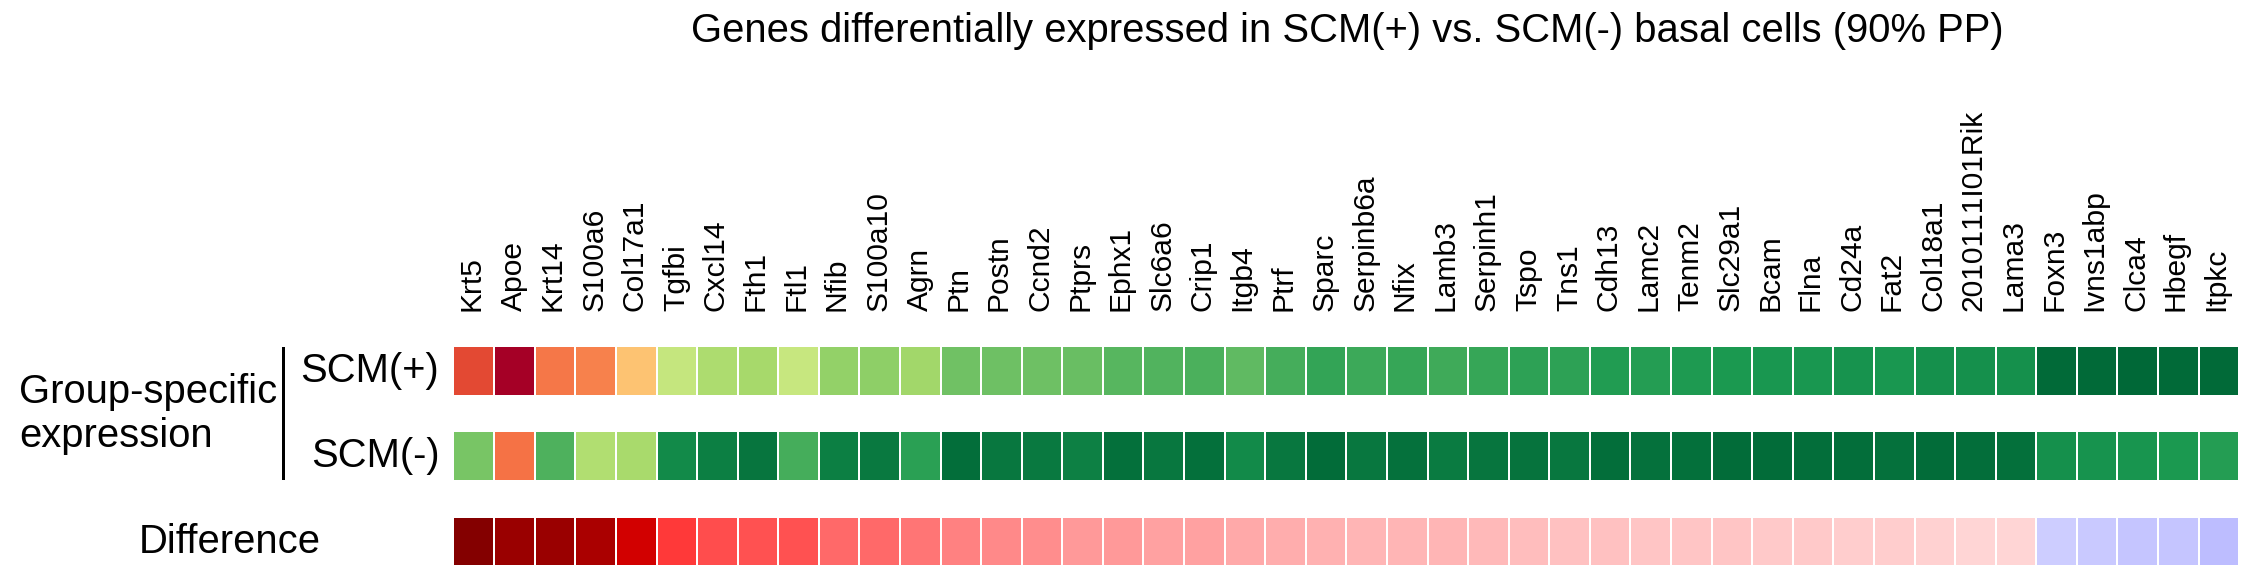

In [270]:
#initialize figure

data1 = NBR_SC_SCMpos_vs_neg_summary.swaplevel(0,1).ix['median'].ix[genes_order.index]['SCMpos'] - 1
data2 = NBR_SC_SCMpos_vs_neg_summary.swaplevel(0,1).ix['median'].ix[genes_order.index]['SCMneg'] - 1
data3 = genes_order_log10

max_expr = 16.0
max_diff = np.log10(10.0 + 1)
min_diff = - np.log10(10.0 + 1)

cmap_expr = plt.cm.RdYlGn_r
cmap_diff = plt.cm.seismic

height = 10
width = 40

plt.figure(facecolor = 'w', figsize = (width, height))
gs = plt.GridSpec(20, 80, hspace = 0.5, wspace = 0.0)

#########################

#title

ax = plt.subplot(gs[0:2,16:80])

ax.text(0.5, 0.5, 'Genes differentially expressed in SCM(+) vs. SCM(-) basal cells (90% PP)', family = 'Liberation Sans', fontsize = 40, 
        va = 'center', ha = 'center')

clean_axis(ax)

#gene names

ax = plt.subplot(gs[2:12,16:80])

ax.set_xlim(-0.5, len(data1.index) - 0.5)
ax.set_ylim(0,1)

for pos, g in enumerate(data1.index):
    
    ax.text(pos, 0.1, g, family = 'Liberation Sans', fontsize = 30, 
            va = 'bottom', ha = 'center', rotation = 'vertical')
    
clean_axis(ax)

#########################

#legend

ax = plt.subplot(gs[12:17,0:10])

ax.text(0.05, 0.5, 'Group-specific\nexpression', family = 'Liberation Sans', fontsize = 40, 
        va = 'center', ha = 'left')

ax.axvline(0.99, color = 'black', linewidth = 3)

clean_axis(ax)

#SCM+ basal signature - legend expression

ax = plt.subplot(gs[12:14,10:16])

ax.text(0.9, 0.5, 'SCM(+)', family = 'Liberation Sans', fontsize = 40, 
        va = 'center', ha = 'right')

clean_axis(ax)

#SCM+ basal signature - heatmap expression

ax = plt.subplot(gs[12:14,16:80])

ax.set_xlim(-0.5, len(data1.index) - 0.5)
ax.set_ylim(0,1)

for pos, val in enumerate(data1):
    
    ax.axvspan(pos - 0.5, pos + 0.5, color = cmap_expr(np.log10(val + 1) / np.log10(max_expr + 1)))
    ax.axvline(pos + 0.5, color = 'white', linewidth = 2)
    
clean_axis(ax)

#########################

#SCM- basal signature - legend expression

ax = plt.subplot(gs[15:17,10:16])

ax.text(0.9, 0.5, 'SCM(-)', family = 'Liberation Sans', fontsize = 40, 
        va = 'center', ha = 'right')

clean_axis(ax)

#SCM- basal signature - heatmap expression

ax = plt.subplot(gs[15:17,16:80])

ax.set_xlim(-0.5, len(data2.index) - 0.5)
ax.set_ylim(0,1)

for pos, val in enumerate(data2):
    
    ax.axvspan(pos - 0.5, pos + 0.5, color = cmap_expr(np.log10(val + 1) / np.log10(max_expr + 1)))
    
    ax.axvline(pos + 0.5, color = 'white', linewidth = 2)
    
clean_axis(ax)

#########################

#SCM- basal signature - legend difference

ax = plt.subplot(gs[18:20,0:16])

ax.text(0.5, 0.5, 'Difference', family = 'Liberation Sans', fontsize = 40, 
        va = 'center', ha = 'center')

clean_axis(ax)

#SCM- basal signature - heatmap difference

ax = plt.subplot(gs[18:20,16:80])

ax.set_xlim(-0.5, len(data3.index) - 0.5)
ax.set_ylim(0,1)

for pos, val in enumerate(data3):
    
    ax.axvspan(pos - 0.5, pos + 0.5, 
               color = cmap_diff((val - min_diff)/(max_diff - min_diff)))
    ax.axvline(pos + 0.5, color = 'white', linewidth = 2)
    
clean_axis(ax)                                  

figname = 'v1.8_6_K_SCMpos_vs_SCMneg.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

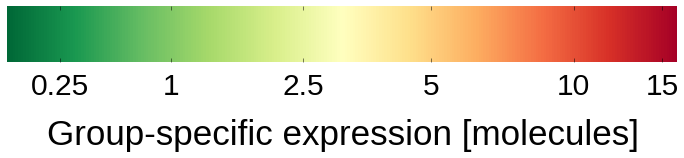

In [1031]:
cmap = plt.cm.RdYlGn_r
max_expr = 16.0

#initialize figure

height = 1
width = 12

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#draw

axLabel = plt.subplot()

for pos in np.arange(0.0, 1.0, 0.001):
    axLabel.axvspan(pos, pos + 0.001, color = cmap(pos))
    
clean_axis(axLabel)

ticks = [15, 10, 5, 2.5, 1, 0.25]

axLabel.set_xticks([np.log10(t + 1) / np.log10(max_expr + 1) for t in ticks])
axLabel.set_xticklabels(ticks, family = 'Liberation Sans', fontsize = 30)
    
plt.rcParams['xtick.major.pad'] = 10

axLabel.set_xlabel('Group-specific expression [molecules]', family = 'Liberation Sans', fontsize = 35)
axLabel.xaxis.set_label_coords(0.5, -1)


figname = 'v1.8_6_M_Legend_expr.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

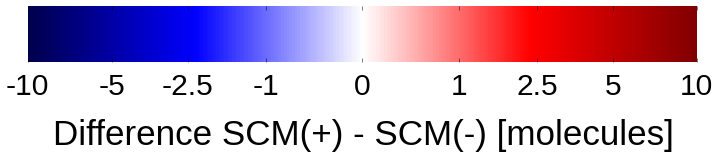

In [1032]:
cmap = plt.cm.seismic
min_diff = -np.log10(10.0+1)
max_diff = np.log10(10.0+1)

#initialize figure

height = 1
width = 12

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#draw

axLabel = plt.subplot()

for pos in np.arange(0.0, 1.0, 0.001):
    axLabel.axvspan(pos, pos + 0.001, color = cmap(pos))
    
clean_axis(axLabel)

cmax = 10    
ticks = [-10, -5, -2.5, -1, 0, 1, 2.5, 5, 10]
ticks_log10 = [-np.log10(10 + 1), -np.log10(5 + 1), -np.log10(2.5 + 1), -np.log10(1 + 1),
               np.log10(0 + 1), np.log10(1 + 1), np.log10(2.5 + 1), np.log10(5 + 1), np.log10(10 + 1)]

axLabel.set_xticks([(t - min_diff)/(max_diff - min_diff) for t in ticks_log10])
axLabel.set_xticklabels(ticks, family = 'Liberation Sans', fontsize = 30)
    
plt.rcParams['xtick.major.pad'] = 10

axLabel.set_xlabel('Difference SCM(+) - SCM(-) [molecules]', family = 'Liberation Sans', fontsize = 35)
axLabel.xaxis.set_label_coords(0.5, -1)

figname = 'v1.8_6_M_Legend_diff.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# SCMpos, SCMneg specific signatures

In [276]:
genes_SCM_bl = neg_binom_extract_genes(NBR_SC_SCMpos_vs_neg_size_bl, score = 'percentile - 5', number = 10)

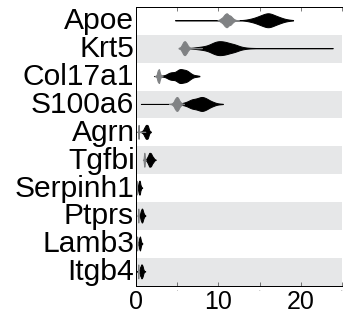

In [343]:
#define input variables

gr_order = ['SCMpos']
genes = genes_SCM_bl
L = len(genes.index)
traces = NBR_SC_SCMpos_vs_neg_traces
cmap = {'SCMpos':'black'}

#initialize figure

height = 5 * len(gr_order)
width = 6

plt.figure(facecolor = 'w', figsize = (width, height))
gs = plt.GridSpec(len(gr_order), 2, hspace = 0.15, wspace = 0.0, width_ratios = [5,8])

#iterate through groups

for pos, gr in enumerate(gr_order):
    
    genes_tmp = [gene for gene in genes[str(gr)].values if gene != None]
    
    #create gene name axis 
    
    ax0 = plt.subplot(gs[pos,0])
    ax0.set_ylim(L - 0.5, -0.5)
    clean_axis(ax0)
    
    #create violin plot axis
    
    ax1 = plt.subplot(gs[pos,1])
    
    ax1.spines['right'].set_color('none')

    ax1.set_ylim(L - 0.5, -0.5)
    ax1.yaxis.set_ticks_position('left')
    ax1.yaxis.set_ticks([])
    
    #iterate over genes
    
    for ix, g in enumerate(genes_tmp):
        ax0.text(0.975, ix, g, family = 'Liberation Sans', fontsize = 30, ha = 'right', va = 'center')
        
        #print background
        
        if ix % 2 == 0:
            ax1.axhspan(ix - 0.5, ix + 0.5, color = '#FFFFFF', zorder = 0)
            
        if ix % 2 == 1:
            ax1.axhspan(ix - 0.5, ix + 0.5, color = '#E6E7E8', zorder = 0)
            
        #print group traces
        
        violin = ax1.violinplot([x - 1 for x in traces.ix[g, str(gr)]],
                       positions = [ix],
                       vert=False,
                       showextrema=False)
        
        for v in violin['bodies']:
            v.set_edgecolor(cmap[gr])
            v.set_facecolor(cmap[gr])
            v.set_linewidth(1.0)
            v.set_alpha(1.0)
            
        #print baseline traces
        
        violin = ax1.violinplot([x - 1 for x in traces.ix[g, 'Baseline']],
                       positions = [ix],
                       vert=False,
                       showextrema=False)
        
        for v in violin['bodies']:
            v.set_edgecolor('#808284')
            v.set_facecolor('#808284')
            v.set_linewidth(1.0)
            v.set_alpha(1.0)

    for ix, t in enumerate(ax1.xaxis.get_ticklabels()):
        if ix % 2 == 0:
            t.set_family('Liberation Sans')
            t.set_fontsize(25)
        else:
            t.set_fontsize(0)
            
figname = 'v1.8_S6_F_SCM_vs_Baseline.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

In [338]:
genes_SCM_gr = neg_binom_extract_genes(NBR_SC_SCMpos_vs_neg_size_comp, score = 'median', number = 10)

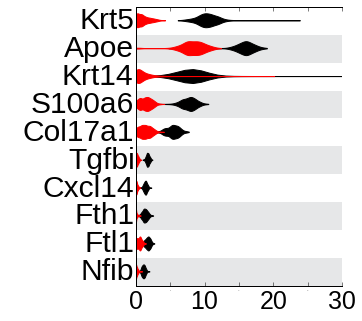

In [345]:
#define input variables

gr_order = ['SCMpos']
genes = genes_SCM_gr
L = len(genes.index)
traces = NBR_SC_SCMpos_vs_neg_traces
summary = NBR_SC_SCMpos_vs_neg_summary[['SCMpos','SCMneg']]
cmap = {'SCMpos':'black'}

#initialize figure

height = 5 * len(gr_order)
width = 6

plt.figure(facecolor = 'w', figsize = (width, height))
gs = plt.GridSpec(len(gr_order), 2, hspace = 0.15, wspace = 0.0, width_ratios = [5,8])

#iterate through groups

for pos, gr in enumerate(gr_order):
    
    genes_tmp = [gene for gene in genes[str(gr)].values if pd.isnull(gene) == False]
    
    #create gene name axis 
    
    ax0 = plt.subplot(gs[pos,0])
    ax0.set_ylim(L - 0.5, -0.5)
    clean_axis(ax0)
    
    #create violin plot axis
    
    ax1 = plt.subplot(gs[pos,1])
    
    ax1.spines['right'].set_color('none')

    ax1.set_ylim(L - 0.5, -0.5)
    ax1.yaxis.set_ticks_position('left')
    ax1.yaxis.set_ticks([])
    
    if len(genes_tmp) == 0:
        
        remove_ticks(ax1)
    
    #iterate over genes
    
    for ix, g in enumerate(genes_tmp):
        ax0.text(0.975, ix, g, family = 'Liberation Sans', fontsize = 30, ha = 'right', va = 'center')
        
        #print background
        
        ax1.set_xlim(0,30)
        
        if ix % 2 == 0:
            ax1.axhspan(ix - 0.5, ix + 0.5, color = '#FFFFFF', zorder = 0)
            
        if ix % 2 == 1:
            ax1.axhspan(ix - 0.5, ix + 0.5, color = '#E6E7E8', zorder = 0)
            
        #print group traces
        
        violin = ax1.violinplot([x - 1 for x in traces.ix[g, str(gr)]],
                       positions = [ix],
                       vert=False,
                       showextrema=False)
        
        for v in violin['bodies']:
            v.set_edgecolor(cmap[gr])
            v.set_facecolor(cmap[gr])
            v.set_linewidth(1.0)
            v.set_alpha(1.0)
            
        #print 2nd group traces
        
        gr_2nd = summary.ix[g].ix['mean'].order().index[-2]
        
        violin = ax1.violinplot([x - 1 for x in traces.ix[g, gr_2nd]],
                       positions = [ix],
                       vert=False,
                       showextrema=False)
        
        for v in violin['bodies']:
            v.set_edgecolor('red')
            v.set_facecolor('red')
            v.set_linewidth(1.0)
            v.set_alpha(1.0)

    for ix, t in enumerate(ax1.xaxis.get_ticklabels()):
        if ix % 2 == 0:
            t.set_family('Liberation Sans')
            t.set_fontsize(25)
        else:
            t.set_fontsize(0)
            
figname = 'v1.8_S6_G_SCMpos_vs_SCMneg.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

In [350]:
genes = NBR_SC_SCMpos_vs_neg_bin_comp['SCMpos'][NBR_SC_SCMpos_vs_neg_bin_comp['SCMpos']==1].index
genes = [g for g in genes if NBR_SC_SCMpos_vs_neg_summary.swaplevel(0,1).ix['median'].ix[g]['SCMpos'] >= 1.25]

In [351]:
len(genes)

39

In [355]:
#select TFs among pseudotime dependent genes

TF_mm9 = open('%s/TF_mm9.txt' % path_input,'r').read().split()

TF_SCM = set(genes) & set(TF_mm9)

In [356]:
TF_SCM

{'Nfib', 'Nfix'}

In [357]:
for g in genes:
    print g

2010111I01Rik
Agrn
Apoe
Bcam
Ccnd2
Cd24a
Cdh13
Col17a1
Col18a1
Crip1
Cxcl14
Ephx1
Fat2
Flna
Fth1
Ftl1
Itgb4
Krt14
Krt5
Lama3
Lamb3
Lamc2
Nfib
Nfix
Postn
Ptn
Ptprs
Ptrf
S100a10
S100a6
Serpinb6a
Serpinh1
Slc29a1
Slc6a6
Sparc
Tenm2
Tgfbi
Tns1
Tspo


# Pseudotime vs. pseudospace dependency (vs. Baseline)

In [361]:
SC_genes = ['Lgr5','Cd34','Gli1','Lgr6','Lrig1','Krt14']

genes_set = {'pan':[],'SC':[]}

for gr in NBR_SC_SC_basal_bin_bl.columns:
    
    genes_tmp = list(NBR_SC_SC_basal_bin_bl[gr][NBR_SC_SC_basal_bin_bl[gr]==1].index)
        
    if gr in SC_genes:
        
        genes_set['SC'] += genes_tmp
        
#genes_set['pan'] = NBR_SC_SCMpos_vs_neg_bin_bl['SCMpos'][ NBR_SC_SCMpos_vs_neg_bin_bl['SCMpos']==1].index
genes_set['pan'] = [g for g in NBR_SC_SCMpos_vs_neg_bin_comp.sum(axis = 1)[NBR_SC_SCMpos_vs_neg_bin_comp.sum(axis=1)>0].index 
                    if NBR_SC_SCMpos_vs_neg_summary.swaplevel(0,1).ix['median'].ix[g][['SCMpos','SCMneg']].max() >= 1.25]
        
genes_set['pan'] = list(set(genes_set['pan']))
genes_set['SC'] = list(set(genes_set['SC']))

In [363]:
#compare pseudotime and pseudospace dependency

genes_sel = list(set(IFE_stats.index) | set(spatial_stats.index))

PT_tmp = -np.log10(IFE_stats.ix[genes_sel,'Pr(>Chisq)']).fillna(0)
PS_tmp = -np.log10(spatial_stats.ix[genes_sel,'Pr(>Chisq)']).fillna(0)

PT_vs_PS = PT_tmp - PS_tmp

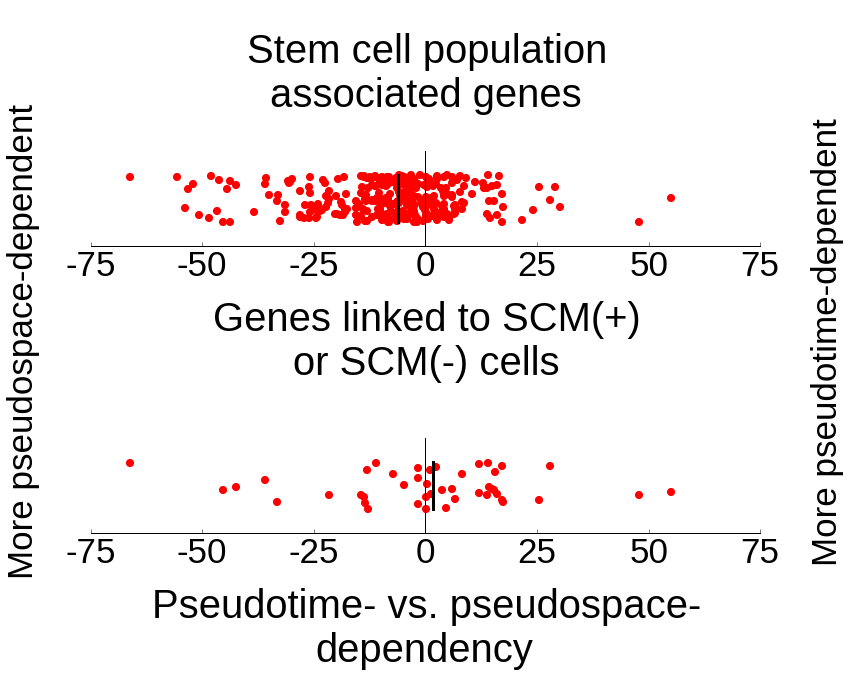

In [364]:
data = PT_vs_PS
genes1 = genes_set['SC']
genes2 = genes_set['pan']

#initialize figure

height = 12
width = 12

fig = plt.figure(facecolor = 'w', figsize = (width, height))

gs = plt.GridSpec(5, 1, hspace=0.5, wspace=0.00)

#draw label 1

ax = plt.subplot(gs[0])

ax.text(0.5, 0.3, 'Stem cell population\nassociated genes', 
        family = 'Liberation Sans', fontsize = 40, va = 'center', ha = 'center')
clean_axis(ax)

#draw plot 1

ax = plt.subplot(gs[1])
ax.set_xlim(-75,+75)
ax.set_xticks([-75,-50,-25,0,25,50,75])
ax.set_xticklabels([-75,-50,-25,0,25,50,75], family = 'Liberation Sans', fontsize = 35)
ax.set_ylim(0,1)
ax.set_yticks([])
ax.spines['right'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')

ax.axvline(0, color = 'black', linewidth = 1)

ax.scatter(data.ix[genes1],[0.25 + np.random.random() * 0.5 for x in genes1], color = 'red', s = 50)
ax.plot([data.ix[genes1].median(),data.ix[genes1].median()], [0.25,0.75], color = 'black', linewidth = 3)

#draw label 2

ax = plt.subplot(gs[2])

ax.text(0.5, 0.5, 'Genes linked to SCM(+)\nor SCM(-) cells', 
        family = 'Liberation Sans', fontsize = 40, va = 'center', ha = 'center')
clean_axis(ax)

ax.text(-0.1, 0.5, 'More pseudospace-dependent', family = 'Liberation Sans', fontsize = 35, 
        rotation = 'vertical', va = 'center', ha = 'center')

ax.text(1.1, 0.5, 'More pseudotime-dependent', family = 'Liberation Sans', fontsize = 35, 
        rotation = 'vertical', va = 'center', ha = 'center')

#draw plot 2

ax = plt.subplot(gs[3])
ax.set_xlim(-75,+75)
ax.set_xticks([-75,-50,-25,0,25,50,75])
ax.set_xticklabels([-75,-50,-25,0,25,50,75], family = 'Liberation Sans', fontsize = 35)
ax.set_ylim(0,1)
ax.set_yticks([])
ax.spines['right'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')

ax.axvline(0, color = 'black', linewidth = 1)

ax.scatter(data.ix[genes2],[0.25 + np.random.random() * 0.5 for x in genes2], color = 'red', s = 50)
ax.plot([data.ix[genes2].median(),data.ix[genes2].median()], [0.25,0.75], color = 'black', linewidth = 3)

#draw label 3

ax = plt.subplot(gs[4])

ax.text(0.5, 0.5, 'Pseudotime- vs. pseudospace-\ndependency', 
        family = 'Liberation Sans', fontsize = 40, va = 'center', ha = 'center')
#ax.text(0.5, 0.0, '(P-value(Pseudotime) [$-\log_{10}$] -\nP-value(Pseudospace) [$-\log_{10}$])', 
        #family = 'Liberation Sans', fontsize = 35, va = 'center', ha = 'center')
clean_axis(ax)

figname = 'v1.8_6_I_Pseudotime_vs_Pseudospace.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

## SC associated genes - Jaccard distance

In [326]:
#bring into compatible format

SC_bin = pd.DataFrame()

for gr in ['Lgr5','Cd34','Gli1','Lgr6','Lrig1','Krt14']:
    
    genes_tmp = list(NBR_SC_SC_basal_bin_bl[gr][NBR_SC_SC_basal_bin_bl[gr]==1].index)
    
    for g in genes_tmp:
    
        SC_bin.ix[gr, g] = 1
        
for g in NBR_SC_SCMpos_vs_neg_bin_bl['SCMpos'][NBR_SC_SCMpos_vs_neg_bin_bl['SCMpos']==1].index:
    
    SC_bin.ix['SCMpos', g] = 1
        
SC_bin = SC_bin.fillna(0)

In [329]:
SC_bin_jaccard = GRN_get_jaccard_dist(SC_bin)

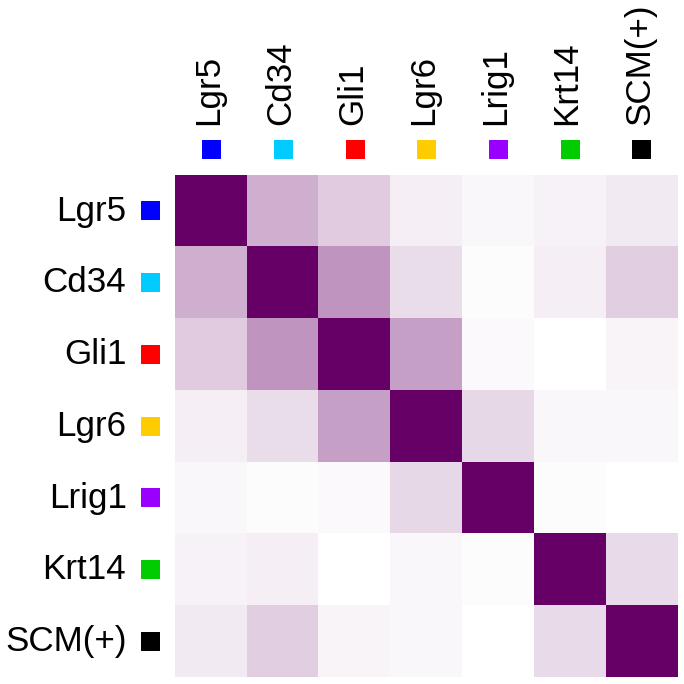

In [333]:
ix_sel = ['Lgr5','Cd34','Gli1','Lgr6','Lrig1','Krt14','SCMpos']
dataset = SC_bin_jaccard.astype(float).ix[ix_sel, ix_sel]

#define colormap

from matplotlib.colors import LinearSegmentedColormap

cmap_tmp = LinearSegmentedColormap.from_list("cmap_tmp", ('#FFFFFF','#660066'), N = 100)

#initialize figure

height = 12
width = 12

fig = plt.figure(facecolor = 'w', figsize = (width, height))

gs1 = plt.GridSpec(2, 2, hspace=0.00, wspace=0.00, height_ratios=[3,9], width_ratios = [3,9])

#draw heatmap in pseudotime

ax0 = plt.subplot(gs1[1,1])

ax0.matshow(dataset, aspect = 'auto', cmap = cmap_tmp, vmin = 0, vmax = 0.5)

clean_axis(ax0)

#draw labels

ax1 = plt.subplot(gs1[0,1])
ax1.set_xlim(-0.5, 6.5)
ax1.set_ylim(0,1)


ax2 = plt.subplot(gs1[1,0])
ax2.set_ylim(6.5, -0.5)
ax2.set_xlim(1,0)

for pos, ix in enumerate(['Lgr5','Cd34','Gli1','Lgr6','Lrig1','Krt14','SCM(+)']):
      
    ax1.scatter(pos, 0.15, color = cmap_SC[ix], marker = 's', s = 300)
    ax2.scatter(0.15, pos, color = cmap_SC[ix], marker = 's', s = 300)  
    
    ax1.text(pos, 0.3, ix, family = 'Liberation Sans', fontsize = 35,
             rotation = 'vertical', va = 'bottom', ha = 'center')
    
    ax2.text(0.3, pos, ix, family = 'Liberation Sans', fontsize = 35,
             rotation = 'horizontal', va = 'center', ha = 'right')
    
    clean_axis(ax1)
    clean_axis(ax2)

figname = 'v1.8_6_H_Jaccard_SCs.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

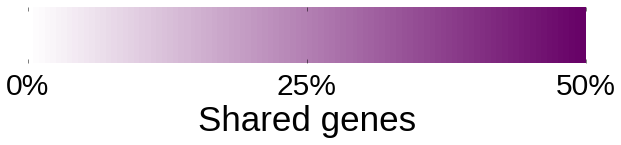

In [112]:
cmap = cmap_tmp

#initialize figure

height = 1
width = 10

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#draw

axLabel = plt.subplot()

for pos in np.arange(0.0, 0.5, 0.001):
    axLabel.axvspan(pos, pos + 0.001, color = cmap(pos / 0.5))
    
clean_axis(axLabel)

axLabel.set_xticks([0.0, 0.25, 0.5])
axLabel.set_xticklabels(['0%', '25%', '50%'], family = 'Liberation Sans', fontsize = 30)
    
plt.rcParams['xtick.major.pad'] = 10

axLabel.set_xlabel('Shared genes', family = 'Liberation Sans', fontsize = 35)
axLabel.xaxis.set_label_coords(0.5, -0.75)

figname = 'v1.8_6_H_SC_Jaccard_legend.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# Save SC neg. binominal regression data to txt file

In [604]:
seq_ = dropNull(seq, path_input, cutoff_mean = 0.00)


Dropping spikes from dataset

Dropping repeats from dataset

Dropping unexpressed genes from dataset


In [606]:
m_ix1, m_ix2 = [],[]

for gr in NBR_SC_SC_basal_size_bl.columns:
    m_ix1 += [gr] * 2
    m_ix2 += ['vs Baseline','vs other groups']
    
NBR_SC_excel = pd.DataFrame(index = seq_.index, columns = [np.array(m_ix1), np.array(m_ix2)])

ix_sel = NBR_SC_SC_basal_size_bl.index.levels[0]

for gr in NBR_SC_SC_basal_size_bl.columns:
    
    NBR_SC_excel[gr, 'vs Baseline'].ix[ix_sel] = NBR_SC_SC_basal_size_bl.swaplevel(0,1).ix['percentile - 25'].ix[ix_sel][gr]
    NBR_SC_excel[gr, 'vs other groups'].ix[ix_sel] = NBR_SC_SC_basal_size_gr.swaplevel(0,1).ix['percentile - 25'].ix[ix_sel][gr]
    
NBR_SC_excel[NBR_SC_excel=='n.s'] = 'n.s.'
NBR_SC_excel = NBR_SC_excel.fillna('b.c.')

In [627]:
#saveData_v1(NBR_SC_excel, path_output, exp_id, 'NBR_SC_excel')